In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD)
        print(MSSFRnameslist[ind_SFRD])
        
        
        

        


0 .0.0.0
000
16 .2.3.1
231
20 .3.1.2
312


In [22]:
print(MSSFRnameslistCSV)
print(MSSFRnameslist)

['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']


In [52]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    
    n=26
    alphabet_ind =  {string.ascii_uppercase[i]: range(n)[i] for i in range(n)}
    existingBPSnameslist_ind = np.vectorize(alphabet_ind.get)(np.asarray(BPSnameslist)) 
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []

#     existingBPSnameslist_ind = np.arange(len(BPSnameslist))
    

    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    
    
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'

        df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]


        if whichRate =='intrinsic':
            rates = rates_L[::2]


        elif whichRate=='observed':
            rates = rates_L[1::2]

        # over different models
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]

        

            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]




            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [49]:
n = 26 # 
alphabet = list(string.ascii_uppercase)[0:n]
numbers = range(n)



print(np.vectorize(alphabet_ind.get)(A))


[0 2 3]


In [56]:
ind_t =2

BPS_withoutE = ['A', 'B', 'C', 'D',  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']



# calculate statistics: 
minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate='intrinsic', DCO_ind=ind_t, BPSnameslist=BPS_withoutE)



print('mean scatter per MSSFR:')
meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
print(meanScatterDueToBPS, len(minMaxPerMSSFR[1]), np.mean(minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])

print('mean scatter per BPS:')   
meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
print(meanScatterDueToMSSFR, len(minMaxPerBPS[1]),  np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))
print(minMaxPerBPS[1]/ minMaxPerBPS[0])



print()
print('---------------')


# calculate statistics: 
minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate='intrinsic', DCO_ind=ind_t, BPSnameslist=BPSnameslist)




print('mean scatter per MSSFR:')
meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
print(meanScatterDueToBPS, len(minMaxPerMSSFR[1]), np.mean(minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])

print('mean scatter per BPS:')   
meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
print(meanScatterDueToMSSFR, len(minMaxPerBPS[1]), np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))
print(minMaxPerBPS[1]/ minMaxPerBPS[0])


mean scatter per MSSFR:
9 28 9.250088581167537
[ 7.09201318 11.18193782  8.93282752  7.11182251 12.72281397  7.44396368
  7.19672566 13.91799766  7.24040549  7.20251223 12.66403105  7.32632714
  6.78361263 14.81951452  6.98069949  7.22489659 15.97151405  6.99030246
  7.28522987 11.52884071  8.54220891  6.980058   13.20647169  7.09880405
  7.06770261 14.39952751  6.94902858  7.14069068]
mean scatter per BPS:
2 19 2.3136621878734136
[1.59269549 1.78312194 1.91246925 1.89984772 2.01677544 1.82230922
 3.97945631 3.54123911 8.23533479 1.83059126 1.62656264 1.56311394
 1.66298149 1.57919268 1.57381384 2.02604996 1.57238419 1.59483257
 2.14680972]

---------------
mean scatter per MSSFR:
226 28 226.44396375024
[292.97130979 159.4872892  379.45299211 277.05640713 179.94545903
 277.37805589 226.44948983 185.13591302 266.98724468 222.71171069
 170.69152696 262.94917318 201.85661687 204.89035293 219.08795396
 181.92668333 210.59224287 210.69620719 179.01503537 158.94764492
 340.44107921 254.96732

In [33]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533
BHBHrate0 = [10.3, 104] #for minimum and maximum of possible local merger rates estimates, 
#  z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf Gpc-3 yr-1 from: GWTC-2-redshift dependent Section 5.3  https://arxiv.org/abs/2010.14533
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf





def plotDCOrates(whichRate='intrinsic'):
    ncols=1
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,18), 
                  gridspec_kw={"width_ratios":[2], "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        

            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                

            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            COLOR=TypeColours[ind_t] 
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
                lw=3.6
            elif MSSFRname=='312':
                COLOR=TypeColours[ind_t]#'c'
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
                lw=3.6

            else:
                # 'lightgray' #MSSFRcolors[ind_L]
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.24
                lw=3
            
#             if MSSFRname in ['111', '121', '131', '211', '221', '231', '311', '321', '331']:
#                 COLOR = 'gray'
                
                
            
            axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=105, label=label, zorder=zorder, alpha=1, linestyle=ls)
            

            


        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0.25 # change to len(df.T)
#         xmax_compare = xmax+5


        # FIX
        fix=1
        


        # calculate statistics: 
        minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

        
        
        
        print('mean scatter per BPS:')
        meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        print(meanScatterDueToBPS, len(minMaxPerMSSFR[1]))
        print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])
        
        print('mean scatter per MSSFR:')   
        meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
        print(meanScatterDueToMSSFR, len(minMaxPerBPS[1]))
        print(minMaxPerBPS[1]/ minMaxPerBPS[0])
        
        
        
        # plot lines for the min & max SFRD values of the fiducial model for comparison
        axe[ind_t].plot([xmin, xmax], [minMaxPerBPS[1][0], minMaxPerBPS[1][0]], c='k', lw=2, label=None, zorder=2, alpha=1, linestyle=':')
        axe[ind_t].plot([xmin, xmax], [minMaxPerBPS[0][0], minMaxPerBPS[0][0]], c='k', lw=2, label=None, zorder=2, alpha=1, linestyle=':')
            
        
#         x = nrDATAready 
        textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
        textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
        
        if whichRate=='intrinsic':
            textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.6502
        axe[ind_t].text(xloc_text, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(xloc_text, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
                        

        ## MAKE RANGE ERROR LINE: 
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-2, color='k', ha='right', va='center')

        
        axe[ind_t].text(-0.6, minn*0.8, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
                

        xx = np.linspace(xmin,xmax,15)
        
        
        # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            if ind_t in [0, 1,2]:
                axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)


            # for BHNS plot that its a upper limit
            if ind_t==1:
                axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=150)
            
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

#         # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '
            
        axe[ind_t].set_xlim(xmin, xmax)
        axe[ind_t] == layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel, setMinor=False)
        axe[ind_t].set_yscale('log')
    
         # Set the tick labels
        axe[ind_t].set_xticks(range(nModels))
    
    
        
        #############################
        
    
        axe[ind_t].set_xticklabels(BPSnameslist)
        
        axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        axe[ind_t].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    


        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe[ind_t].twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-10, rotation=30)#, orientation=30)      

    
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe[ind_t].set_xticks(range(nModels))
            axe[ind_t].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe[ind_t].set_xticks([])
            axe[ind_t].set_xticklabels( () )
    print(nModels, 'nModels')
    
    #############################################################################
    #############################################################################
    # the following block marks the simulations where all 3 DCO flavors are consistent with LIGO Virgo 90% credible intervals with a red cross.      
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_t, DCOtype in enumerate(Types):

            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                
            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $' 


            if ind_t==0:
                rate_BHBH = rates
            elif ind_t==1:
                rate_BHNS = rates
            elif ind_t==2:
                rate_NSNS = rates 

        maskBHBH = (rate_BHBH>= BHBHrate0[0]) & (rate_BHBH <=BHBHrate0[1])
        maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
        maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

        maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 

        # draw the red crosses 
        axe[0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHBH[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)
        axe[1].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHNS[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)
        axe[2].scatter((np.array(range(len(rates))))[maskGWTC2], rate_NSNS[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)



    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./Rates_' +whichRate + '_with_GWTC2-2.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +whichRate + '_with_GWTC2-2.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




the intrinsic fiducial rate for  BBH = 33.52050521653553
mean scatter per BPS:
6 28
[11.28234007  4.80454971  8.48182705 25.93733941  3.07734084  3.4280906
  5.24912272  3.1288316   3.1339876   4.65463341  3.59999491  4.38749643
 19.60720796  2.57059198  2.48794941  3.54328031  2.60805808  2.40012339
  3.46873786  4.59795385  8.87394008 25.62939337  2.96760151  3.40292802
  5.14261947  3.00988308  3.13511189  4.60940718]
mean scatter per MSSFR:
20 20
[18.21681189 16.28331516 15.21693588 15.85026634 18.14547945 13.36976216
 18.5816696  19.46821603 18.38253568 27.86453492 13.41205293 15.98721731
 16.9283989  19.94828011 18.68973042 17.21120355 16.88089498 17.08154286
  8.69330717 81.54093377]
the intrinsic fiducial rate for  BHNS = 43.022776513041364
mean scatter per BPS:
69 28
[85.49183539 70.53181712 77.19999025 89.2504661  65.56450405 66.86155329
 76.43403427 64.58569665 64.45519465 74.60141259 63.04803472 61.31623011
 74.09139232 59.66819606 57.01518167 65.32302581 58.89988489 55.112

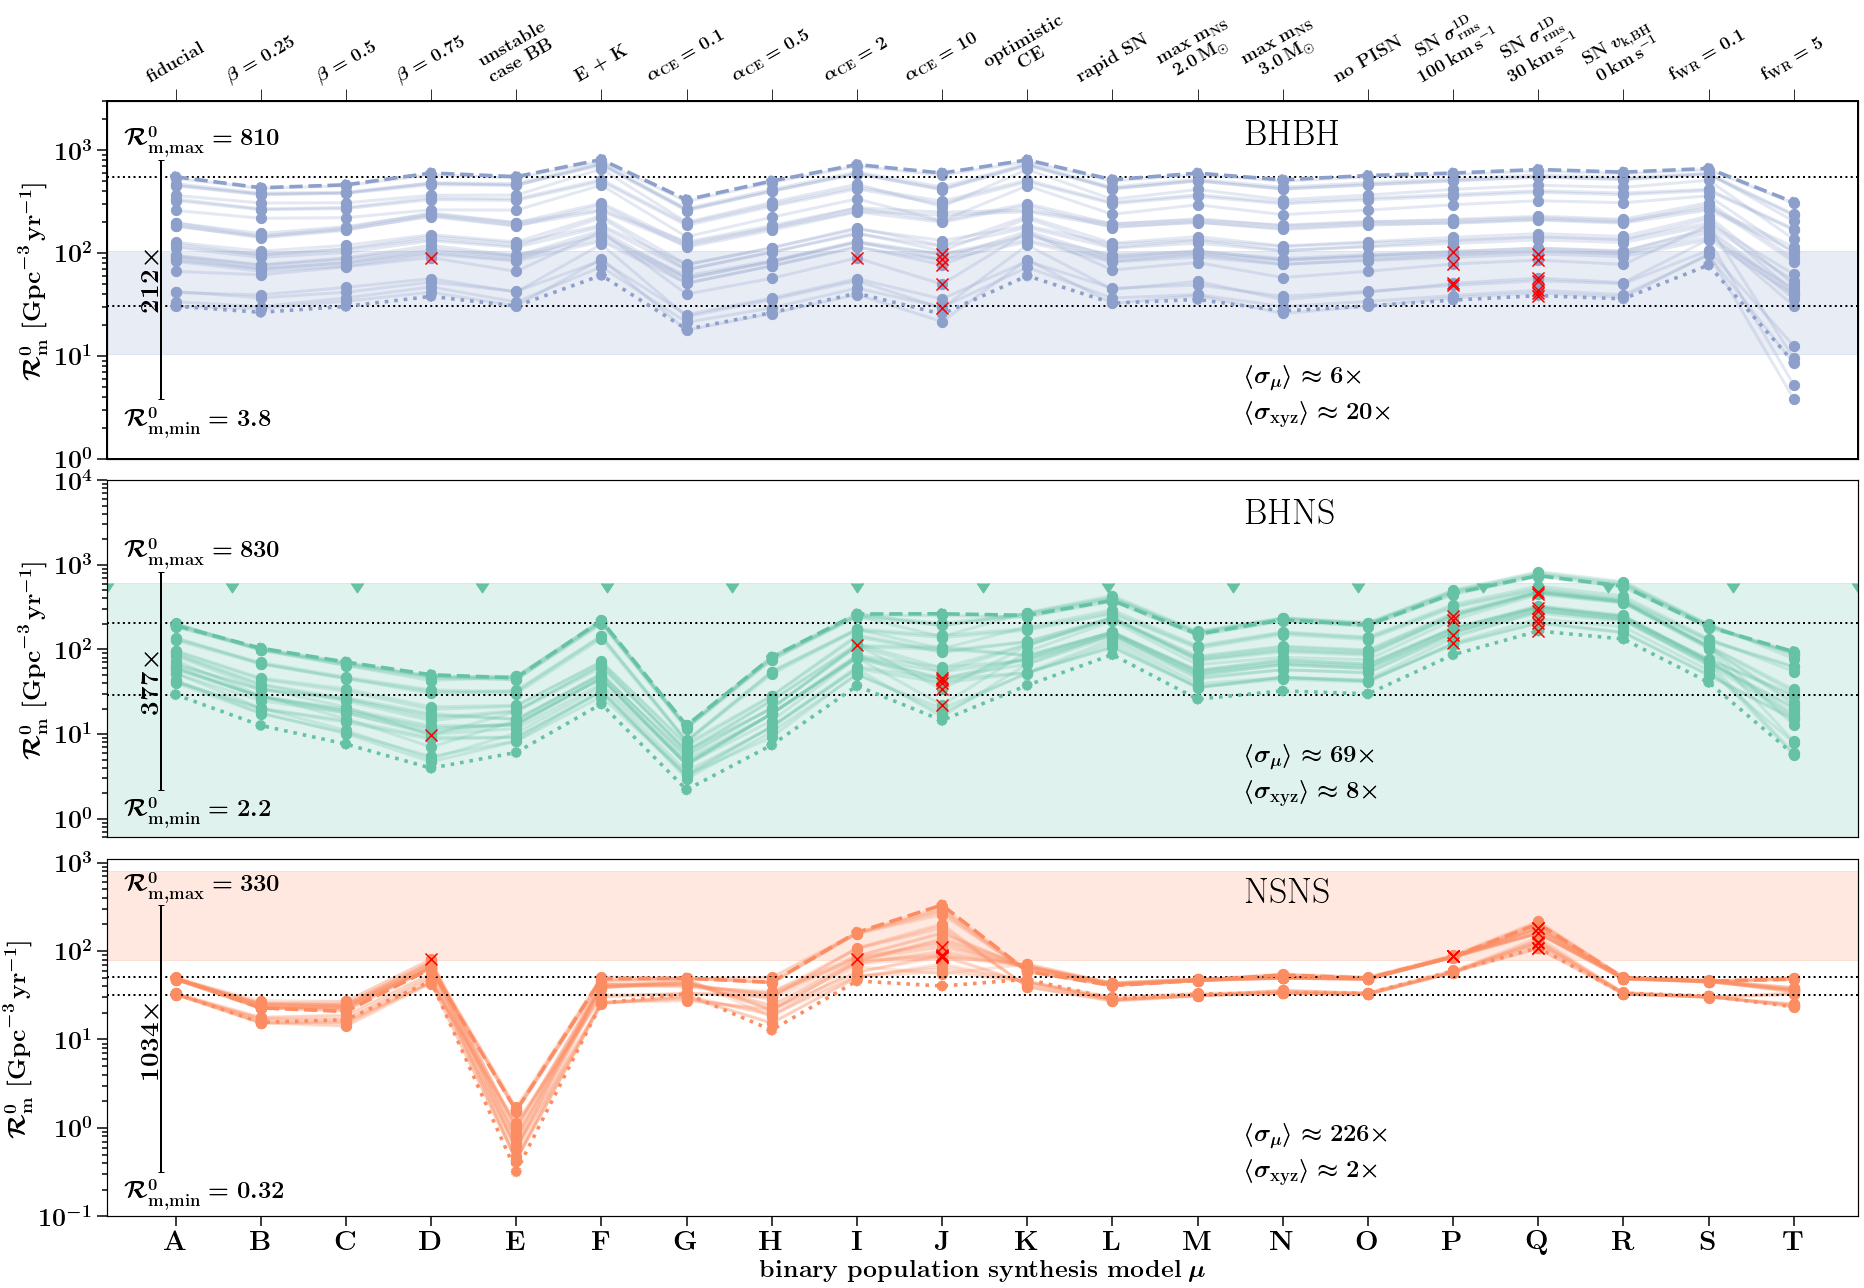

In [32]:

ylims =[[1,3000],[0.6,10000],[0.1,1100]]
plotDCOrates(whichRate='intrinsic')

# Plot the same figure as above, but with each line SFRD(Z,z) line seperately 

In [18]:
fs = 28 

NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533
BHBHrate0 = [10.3, 104] #for minimum and maximum of possible local merger rates estimates, 
#  z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf Gpc-3 yr-1 from: GWTC-2-redshift dependent Section 5.3  https://arxiv.org/abs/2010.14533
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf






def plotDCOrates_seperate(whichRate='intrinsic', mssfr_ind=0):
    '''
    mssfr_ind = number from 0 to 27 for the index of the mssfr model
    '''

    
    
    
    ncols=1
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,16), 
                  gridspec_kw={"width_ratios":[2], "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            if ind_L == mssfr_ind:
                
                xloc_text = 0.8502
                axe[ind_t].text(xloc_text, 0.1, s=r'$\rm{xyz} = $ %s'%MSSFRnameslist[mssfr_ind], rotation = 0, fontsize = fs, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)





                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'



                if MSSFRname=='231':
                    COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                    lw=3.6
                elif MSSFRname=='312':
                    COLOR=TypeColours[ind_t]#'c'
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
                    lw=3.6

                else:
                    COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.24
                    lw=3




                axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=105, label=label, zorder=zorder, alpha=1, linestyle=ls)



            
                


        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0.25 # change to len(df.T)
#         xmax_compare = xmax+5


        # FIX
        fix=1
        


        # calculate statistics: 
        minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

        
        
        
        print('mean scatter per MSSFR:')
        meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
        print('mean scatter per BPS:')   
        meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
#         x = nrDATAready 
        textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
        textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
        
        if whichRate=='intrinsic':
            textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.6502
#         axe[ind_t].text(xloc_text, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
#         axe[ind_t].text(xloc_text, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
                        

        ## MAKE RANGE ERROR LINE: 
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-2, color='k', ha='right', va='center')

        
        axe[ind_t].text(-0.6, minn*0.8, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
        axe[ind_t].text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
                

        xx = np.linspace(xmin,xmax,15)
        
        
        # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            if ind_t in [0, 1,2]:
                axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)

            
#             elif ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t].fill_between(xx, min_obs_rate2, max_obs_rate2,  alpha=0.2, color=TypeColours[ind_t], zorder=0)
#                 axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color='cyan', zorder=0)
# #                 axe[ind_t].plot(xx, min_obs_rate, c='k', linestyle=':', lw=1., alpha=0.5)
# #                 axe[ind_t].plot(xx, max_obs_rate, c='k', linestyle=':', lw=1., alpha=0.5)

            # for BHNS plot that its a upper limit
            if ind_t==1:
                axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=100)
            
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

#         # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '
            
        axe[ind_t].set_xlim(xmin, xmax)
        axe[ind_t] == layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel, setMinor=False)
        axe[ind_t].set_yscale('log')
    
         # Set the tick labels
#         if ind_t==2:
        axe[ind_t].set_xticks(range(nModels))
    
    

        
        #############################
        
    
        axe[ind_t].set_xticklabels(BPSnameslist)
        
        axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        
        axe[ind_t].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    


        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe[ind_t].twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-10, rotation=30)#, orientation=30)      

    
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe[ind_t].set_xticks(range(nModels))
            axe[ind_t].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe[ind_t].set_xticks([])
            axe[ind_t].set_xticklabels( () )
    print(nModels, 'nModels')
    # mark the simulations where all 3 DCO flavors are consistent with 90% confidence interval red.      
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        if ind_L == mssfr_ind:
            for ind_t, DCOtype in enumerate(Types):
            

                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $' 



                if ind_t==0:
                    rate_BHBH = rates
                elif ind_t==1:
                    rate_BHNS = rates
                elif ind_t==2:
                    rate_NSNS = rates 

            maskBHBH = (rate_BHBH>= ObservedRatesList[0][0]) & (rate_BHBH <=ObservedRatesList[0][1])
            maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

            maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 


            axe[0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHBH[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)
            axe[1].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHNS[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)
            axe[2].scatter((np.array(range(len(rates))))[maskGWTC2], rate_NSNS[maskGWTC2], s=145, c='r', marker='x', zorder=1E8)


    ################################################################
    ################################################################
    ################################################################
    
        
    


            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./supplementary_material/Rates_' +whichRate + '_'+ MSSFRnameslist[mssfr_ind] + '.png', dpi=300, transparent=False)#,\
#     plt.savefig('./Rates_' +whichRate + '_with_GWTC2_and_comparisonBPS.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return





the intrinsic fiducial rate for  BBH = 33.52050521653553
mean scatter per MSSFR:
mean scatter per BPS:
the intrinsic fiducial rate for  BHNS = 43.022776513041364
mean scatter per MSSFR:
mean scatter per BPS:
the intrinsic fiducial rate for  BNS = 33.38711265814328
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels
the intrinsic fiducial rate for  BBH = 33.52050521653553
the intrinsic fiducial rate for  BHNS = 43.022776513041364
the intrinsic fiducial rate for  BNS = 33.38711265814328


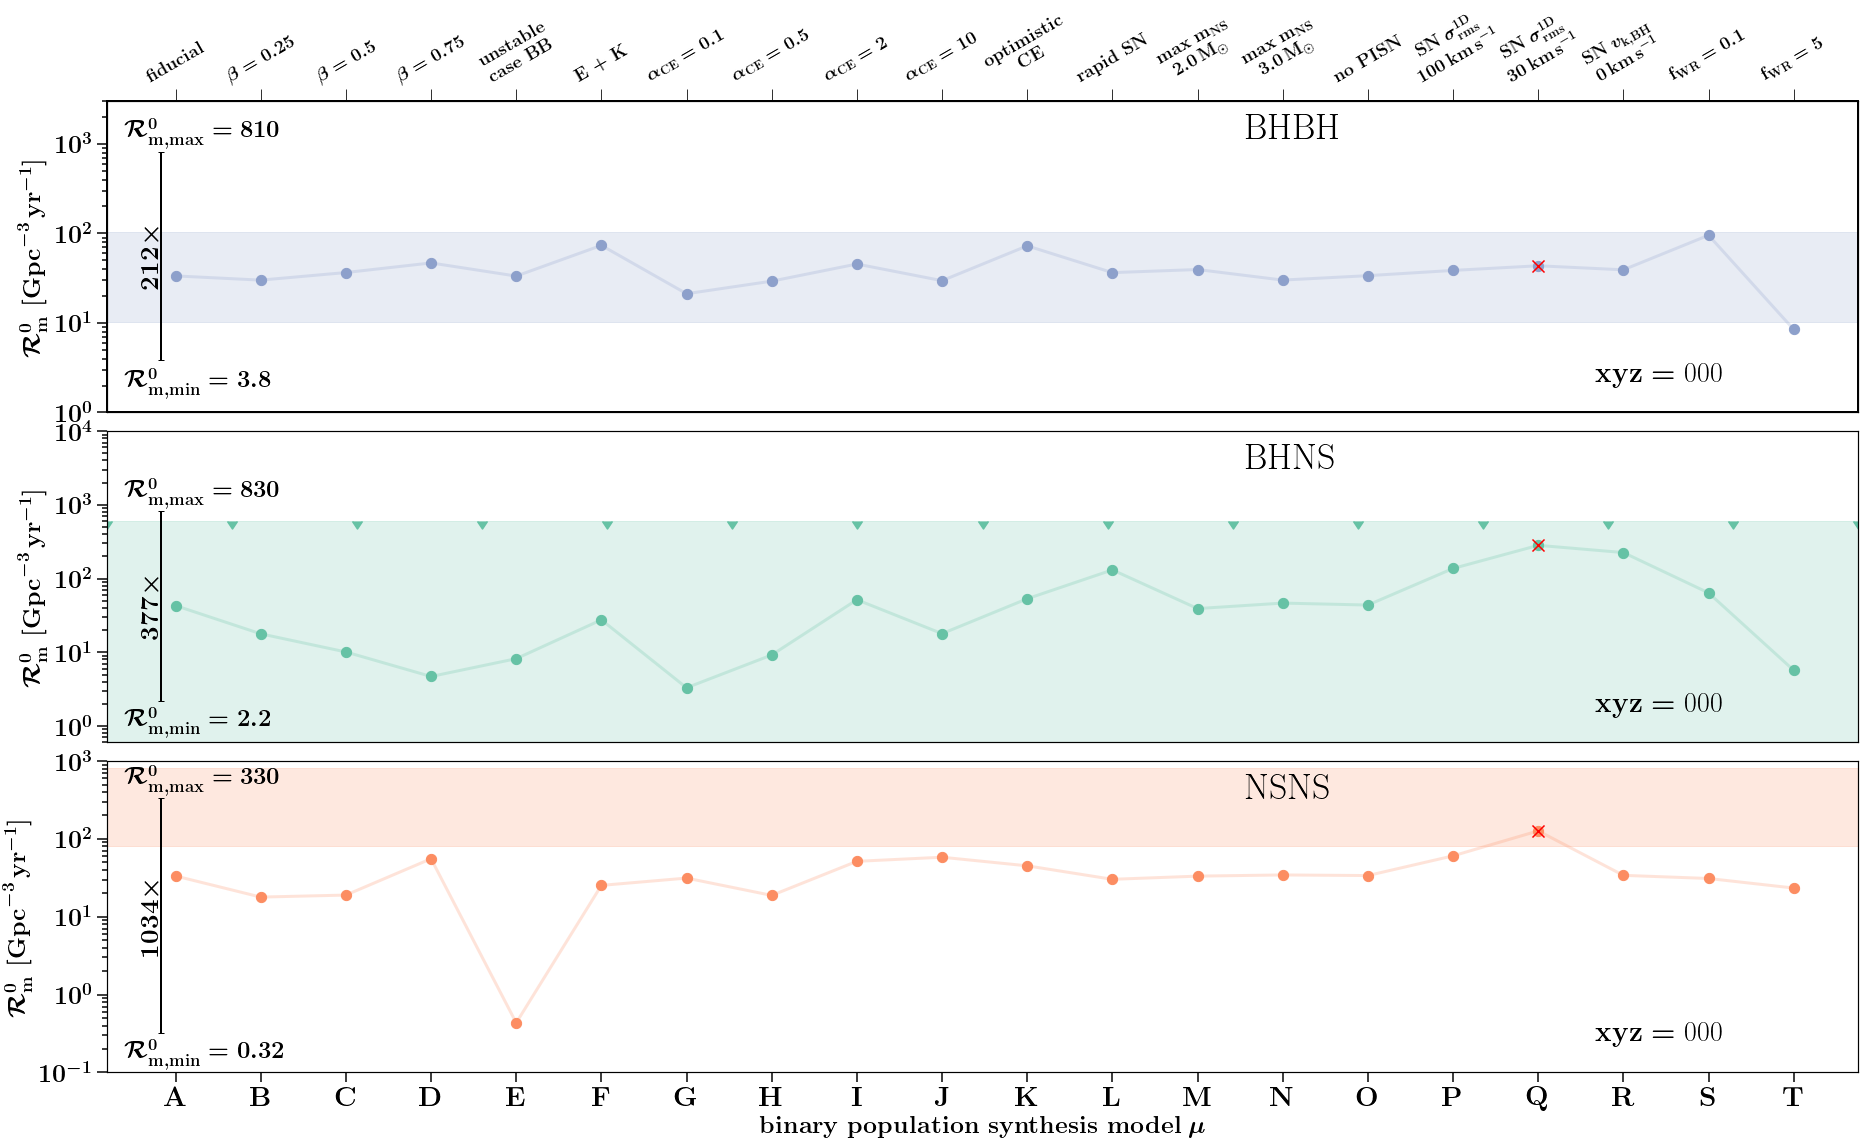

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


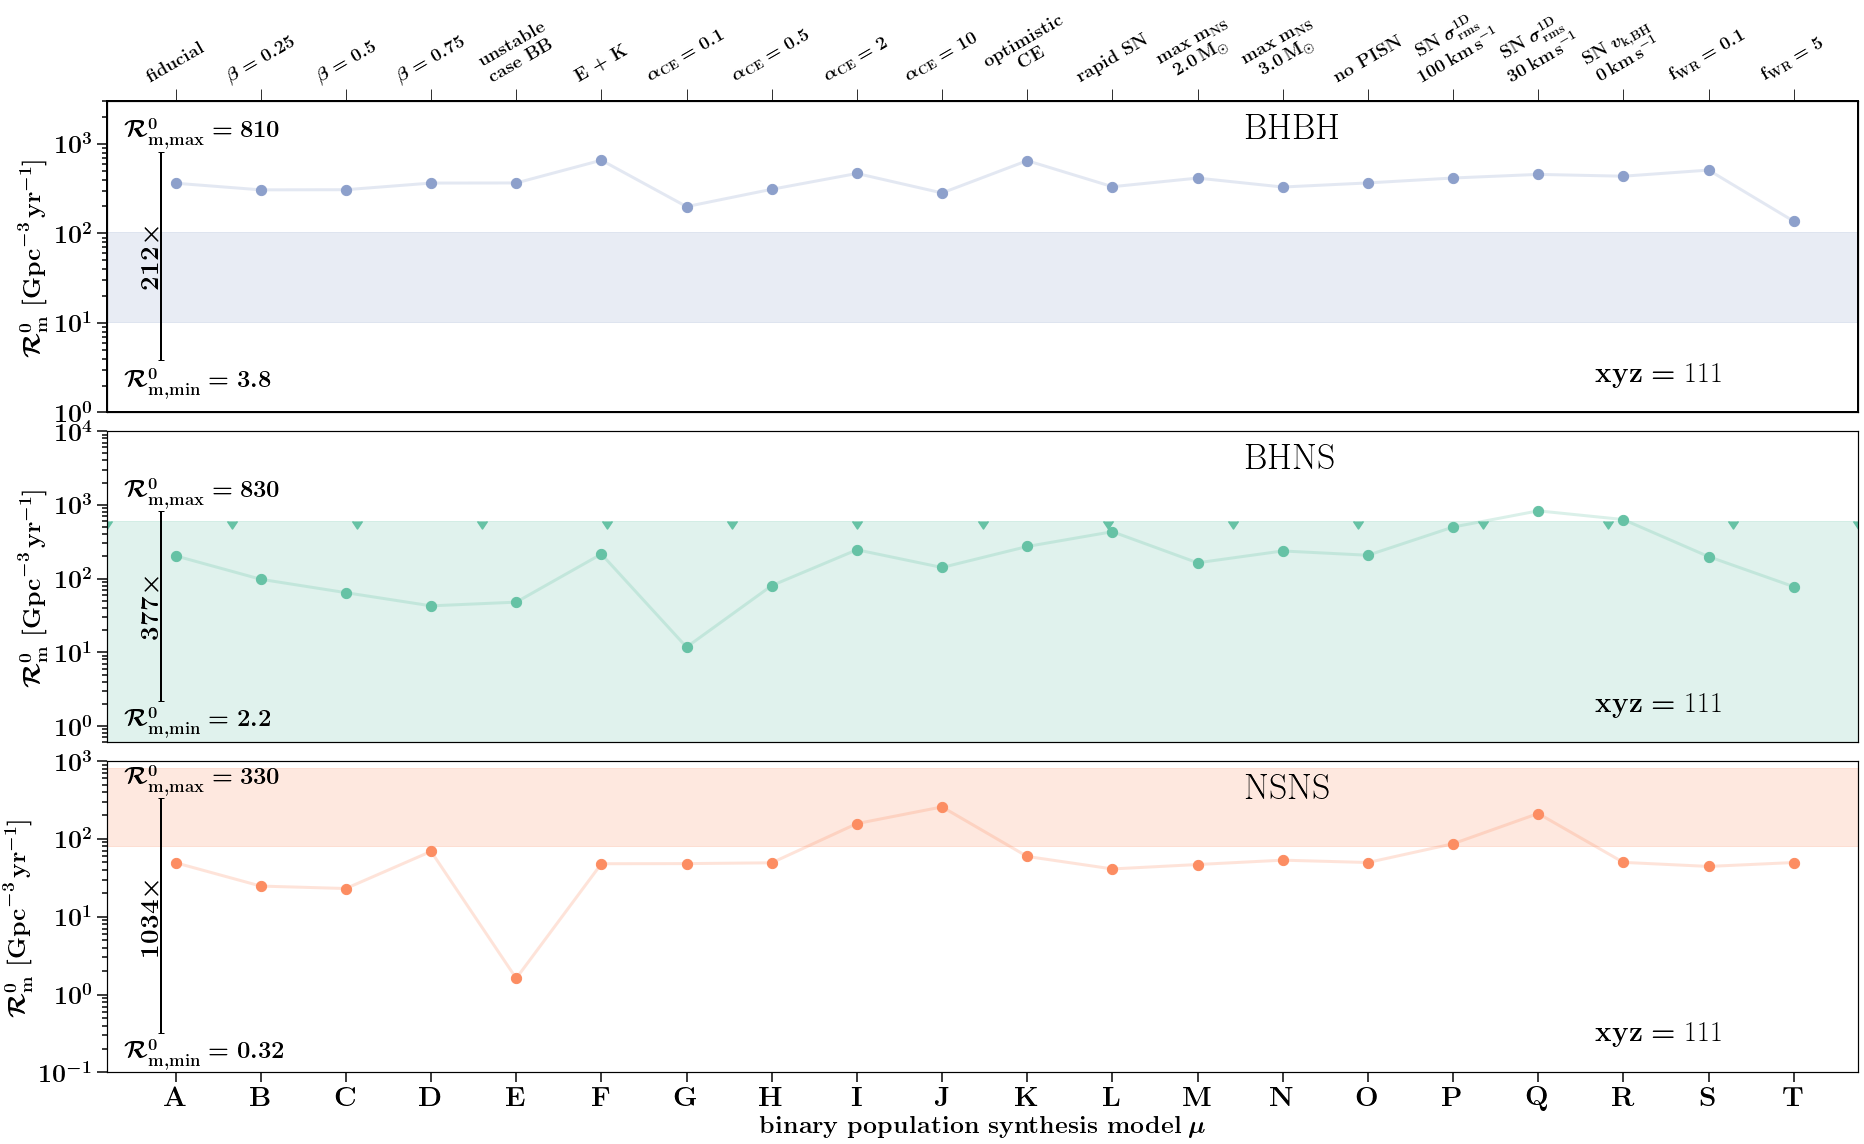

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


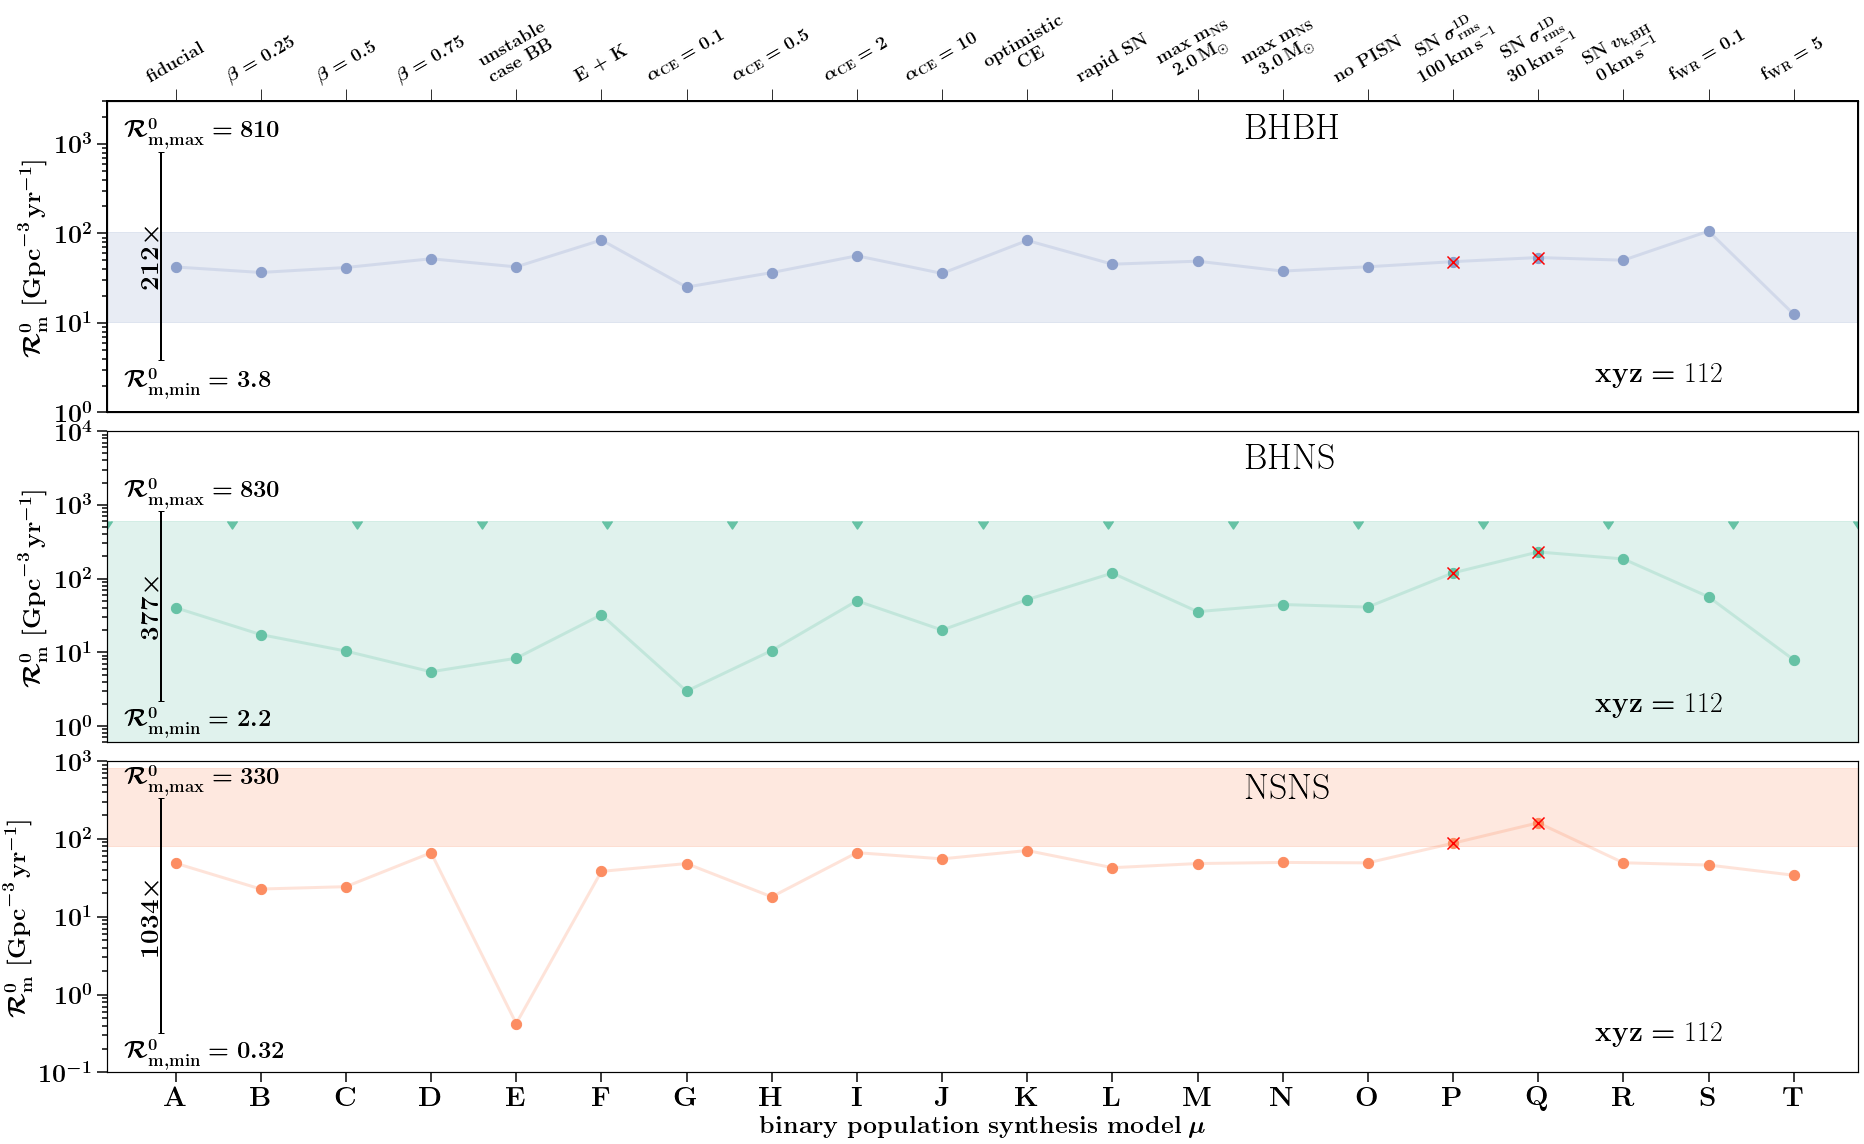

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


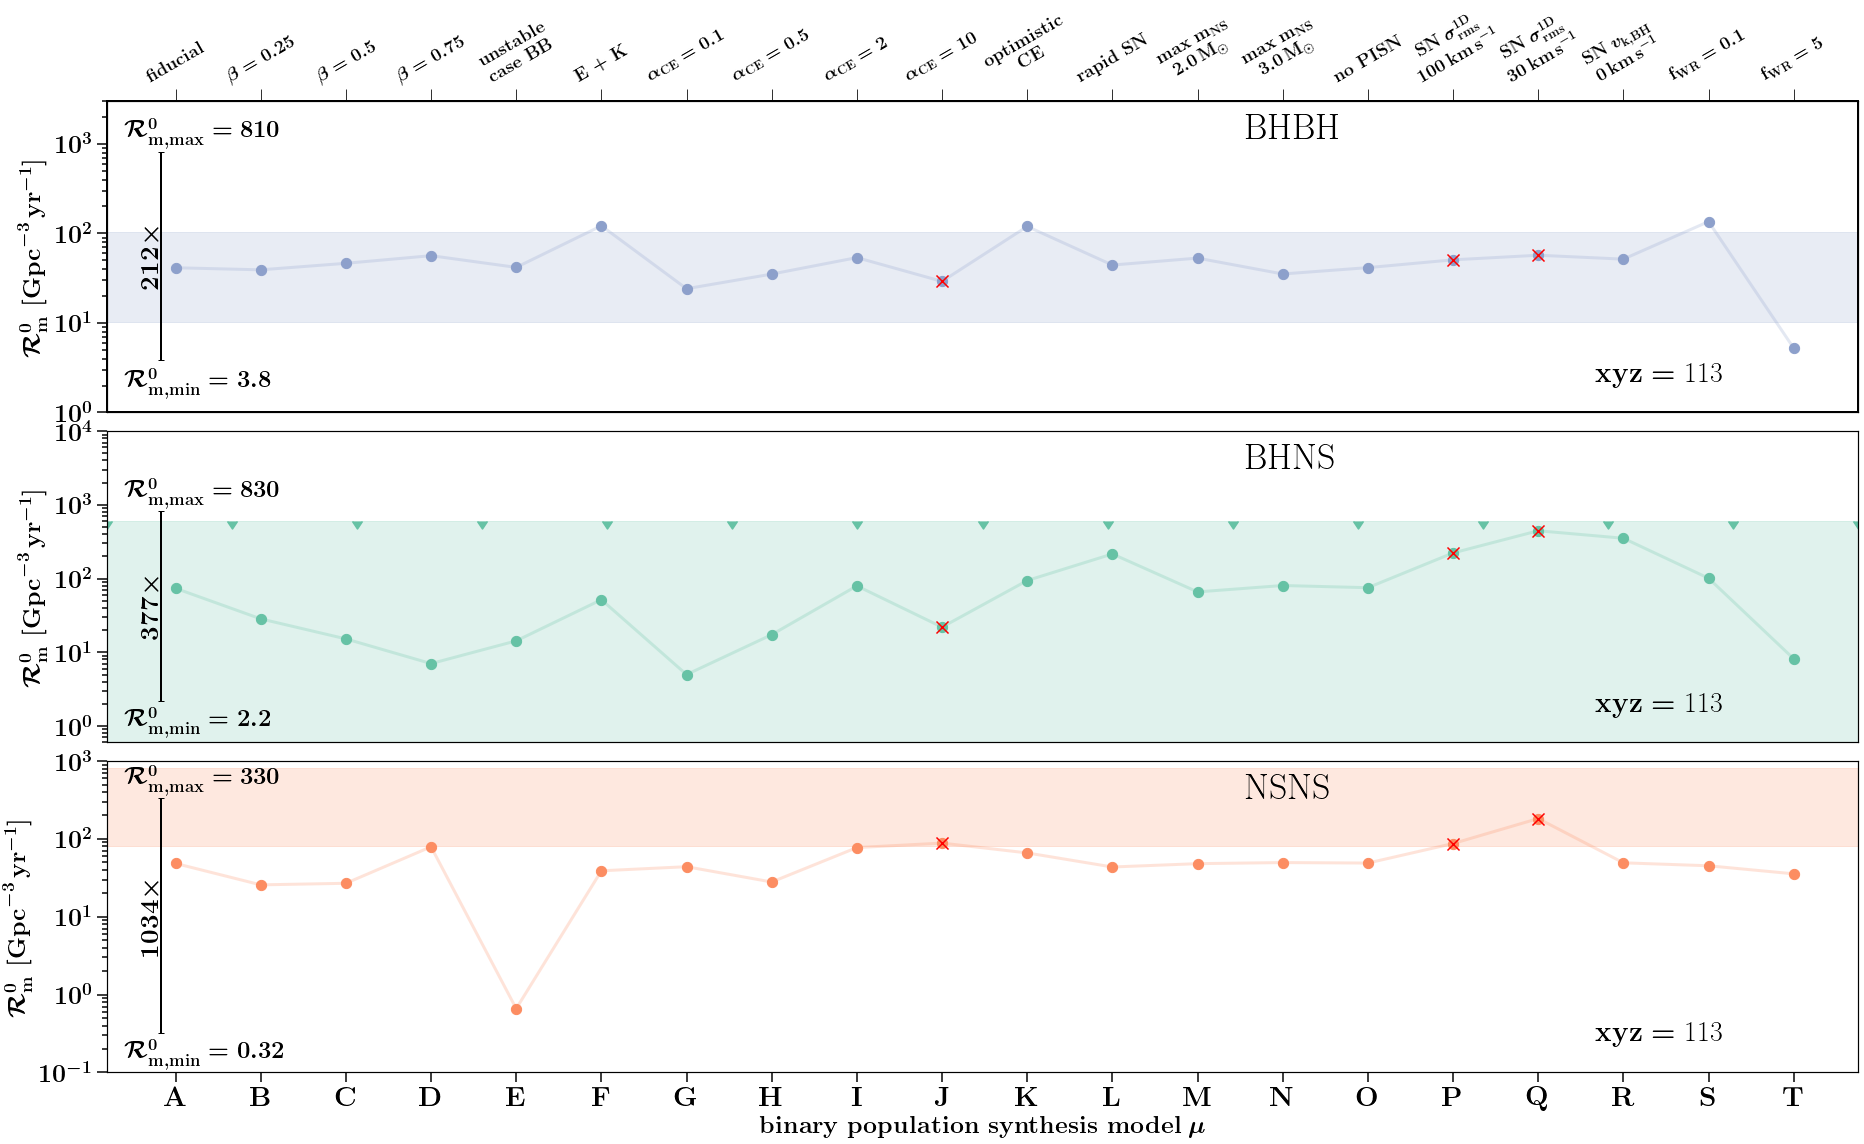

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


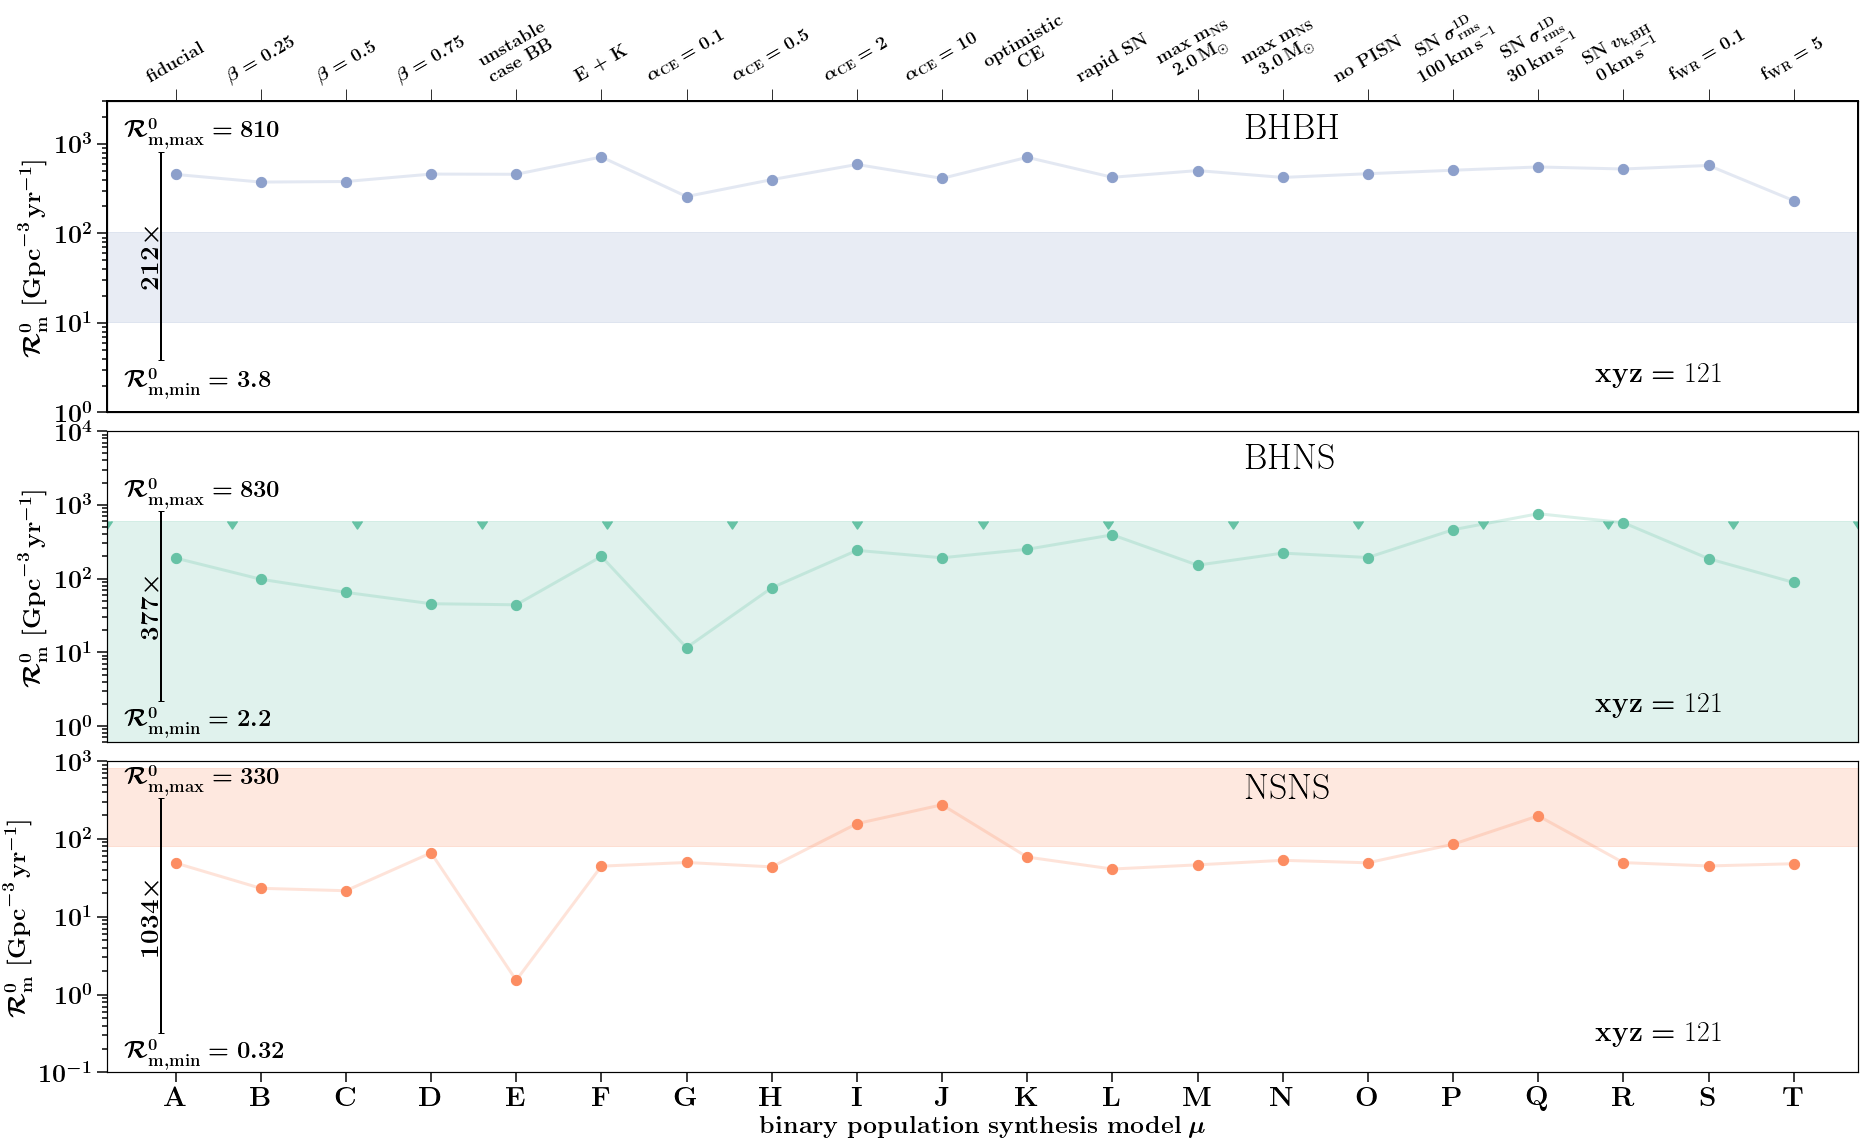

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


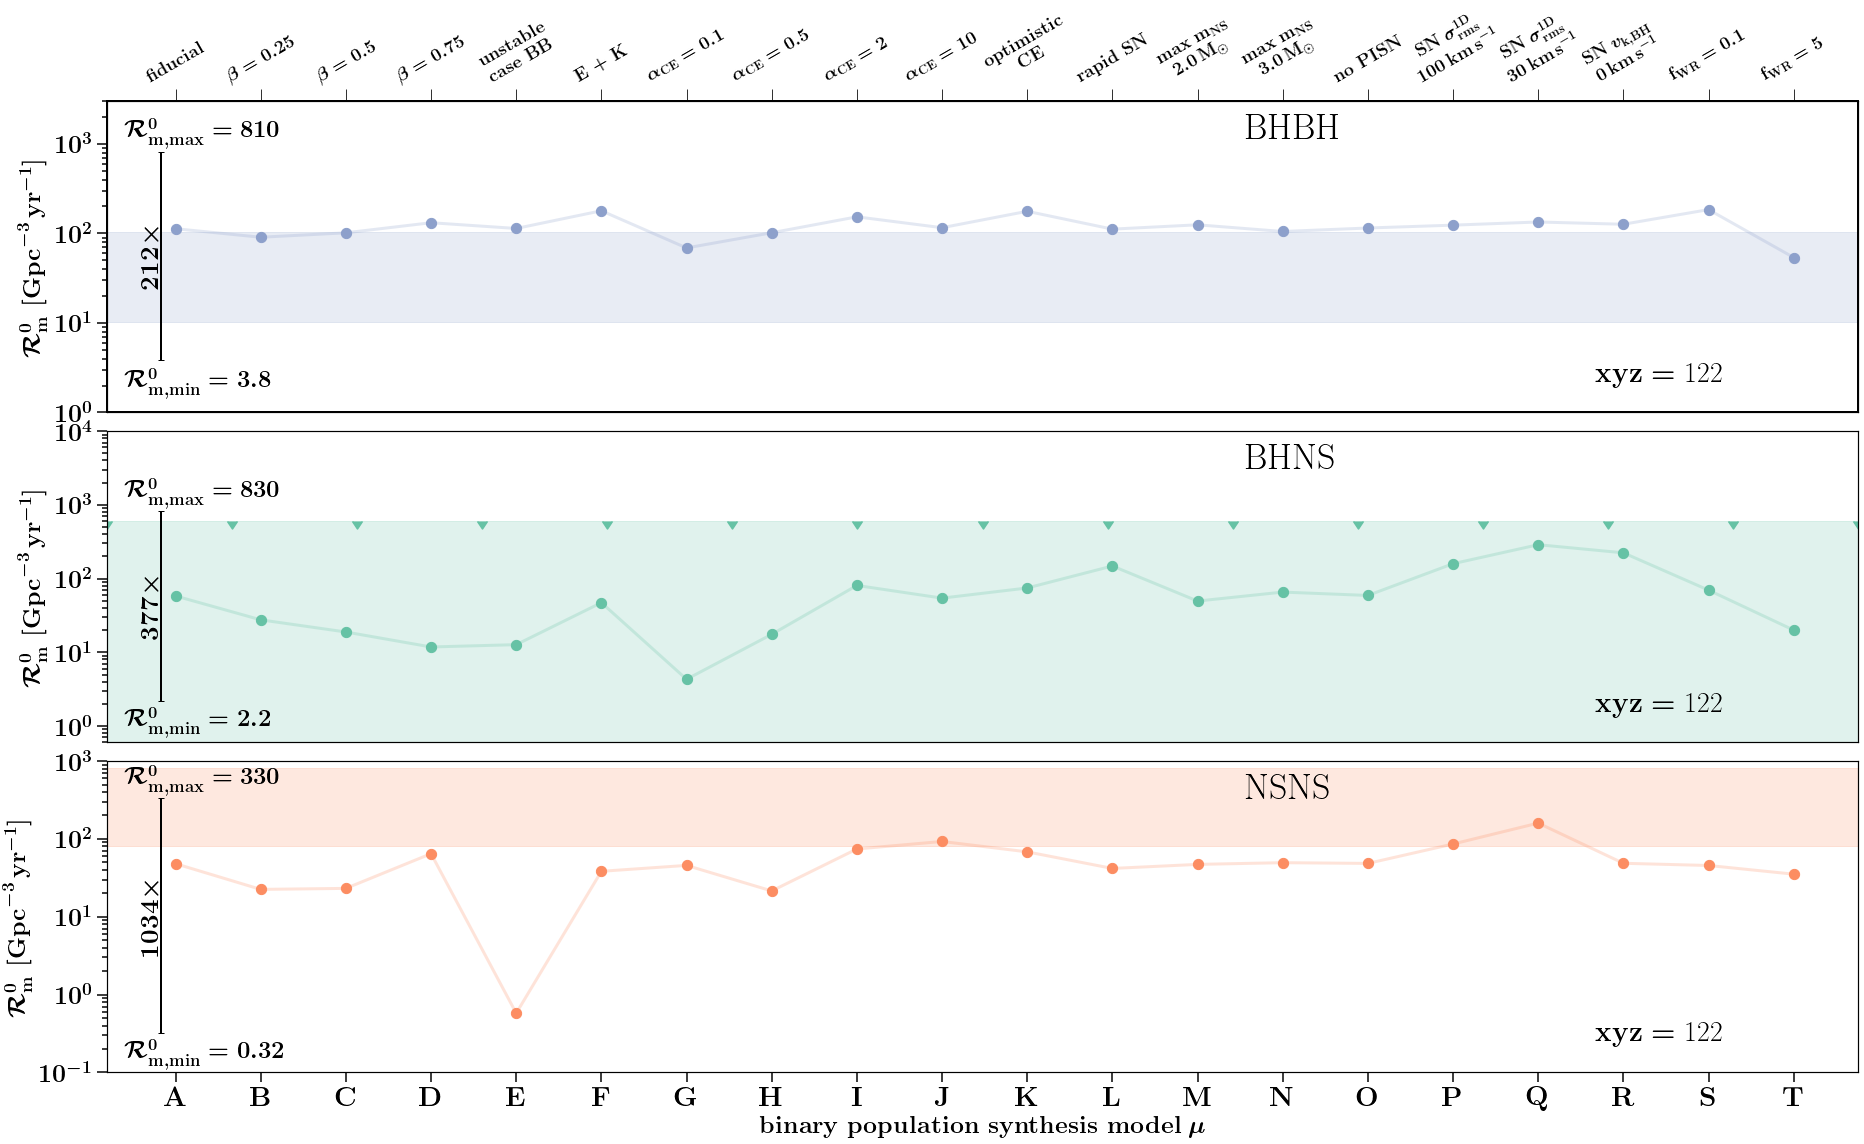

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


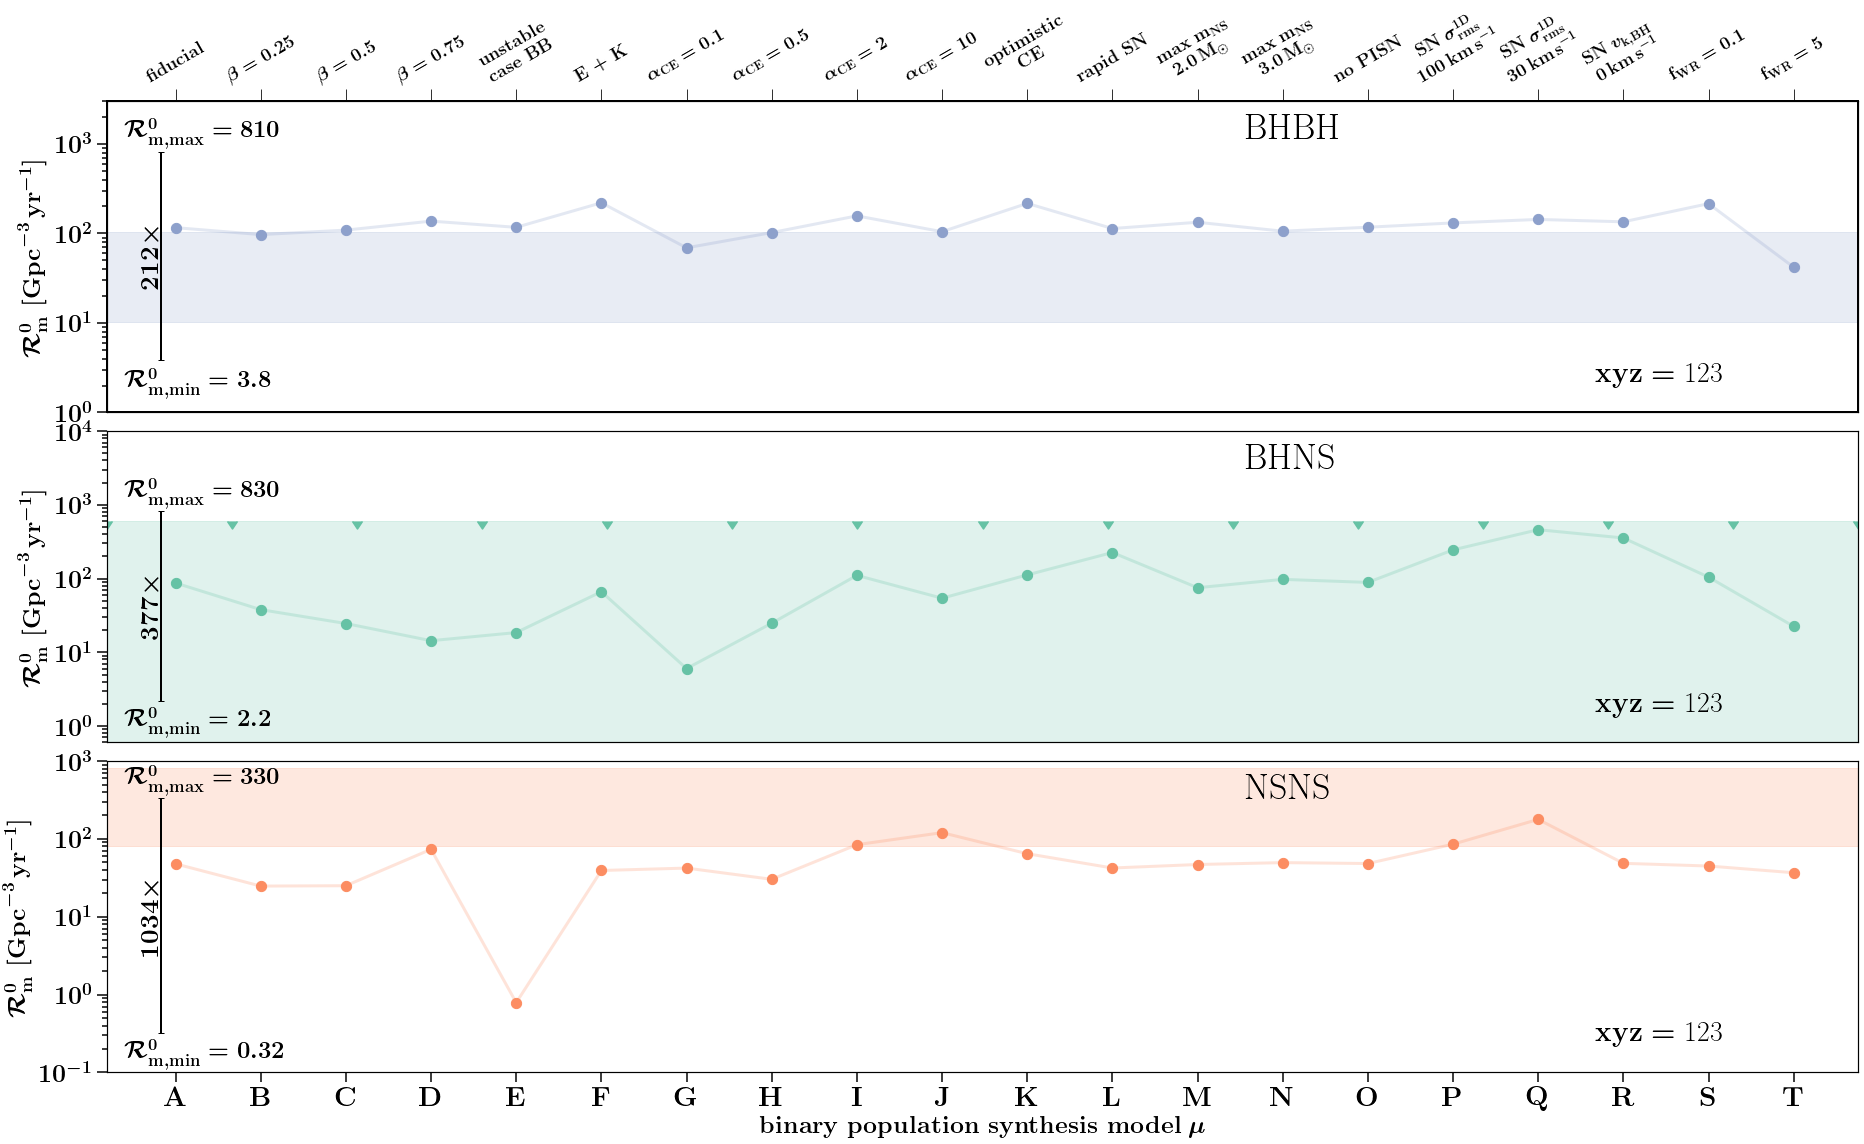

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


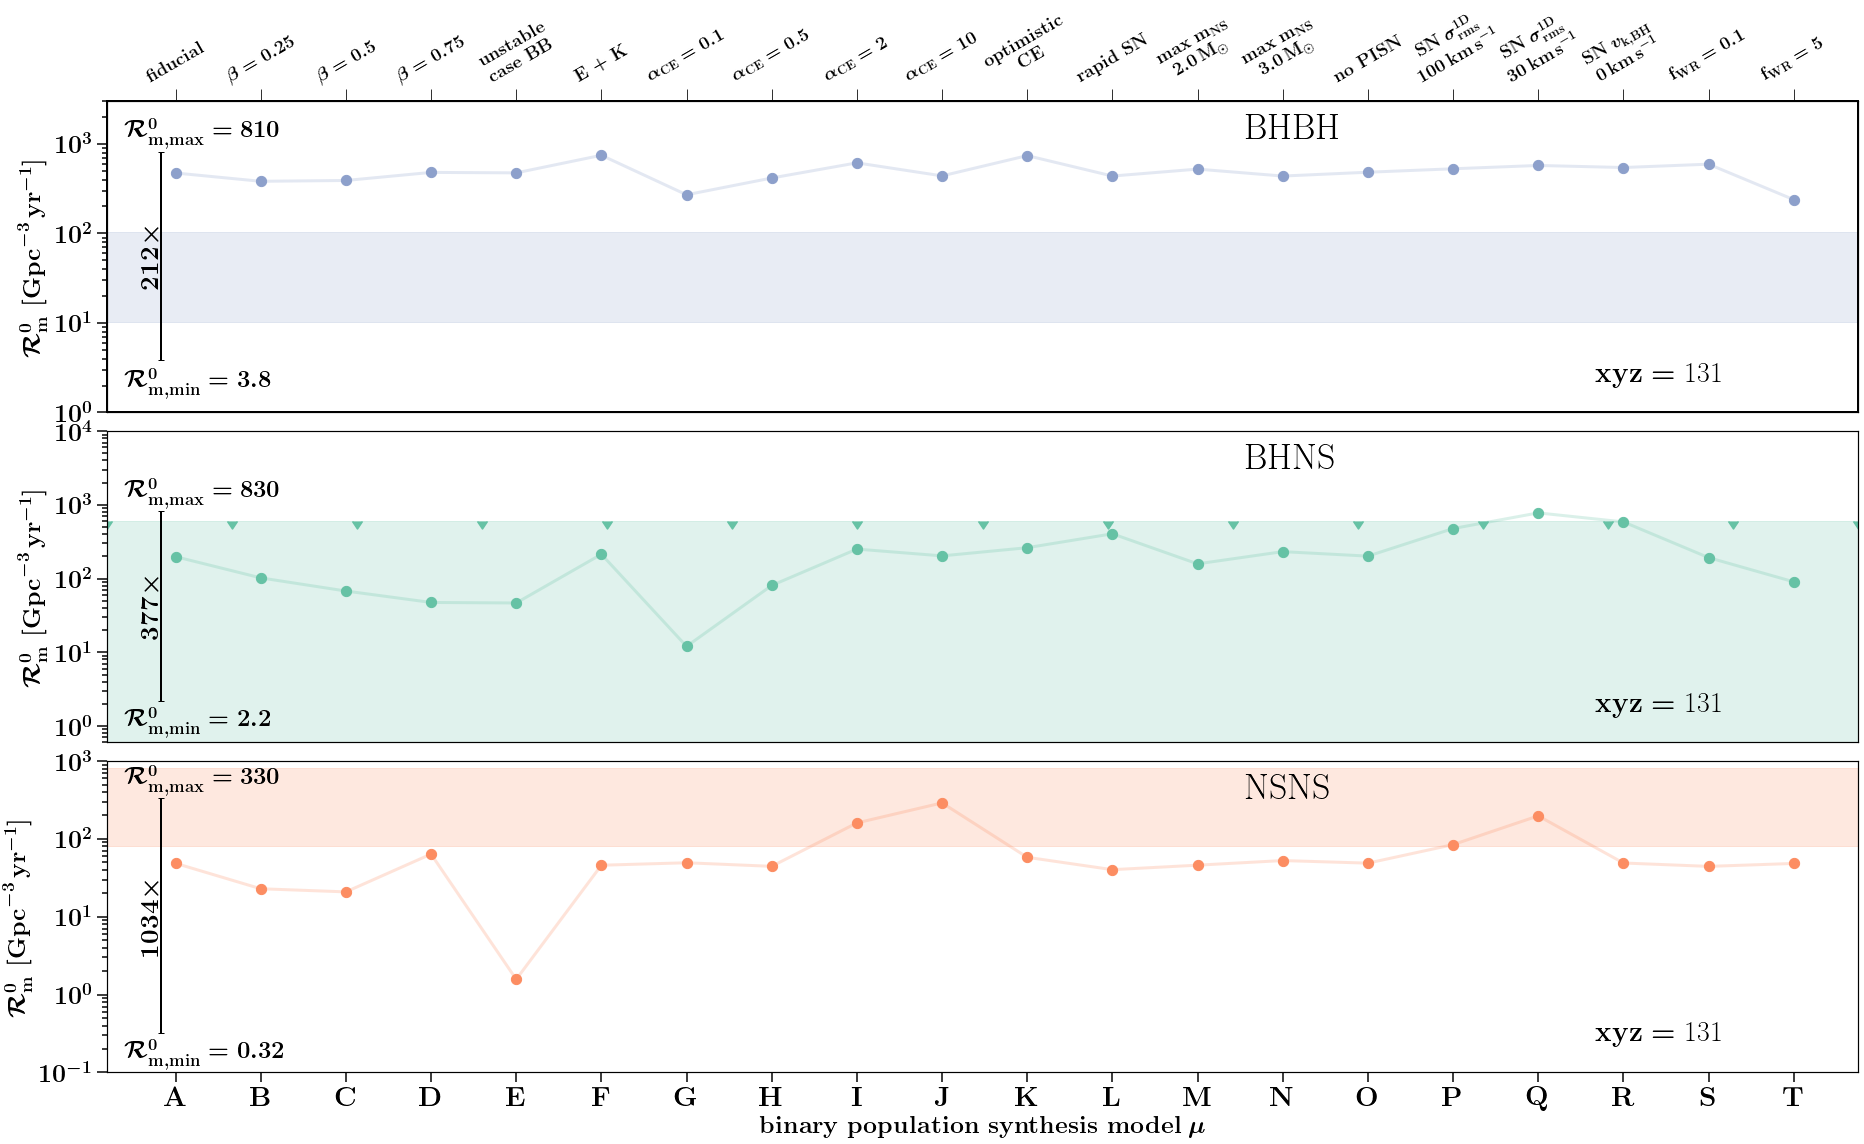

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


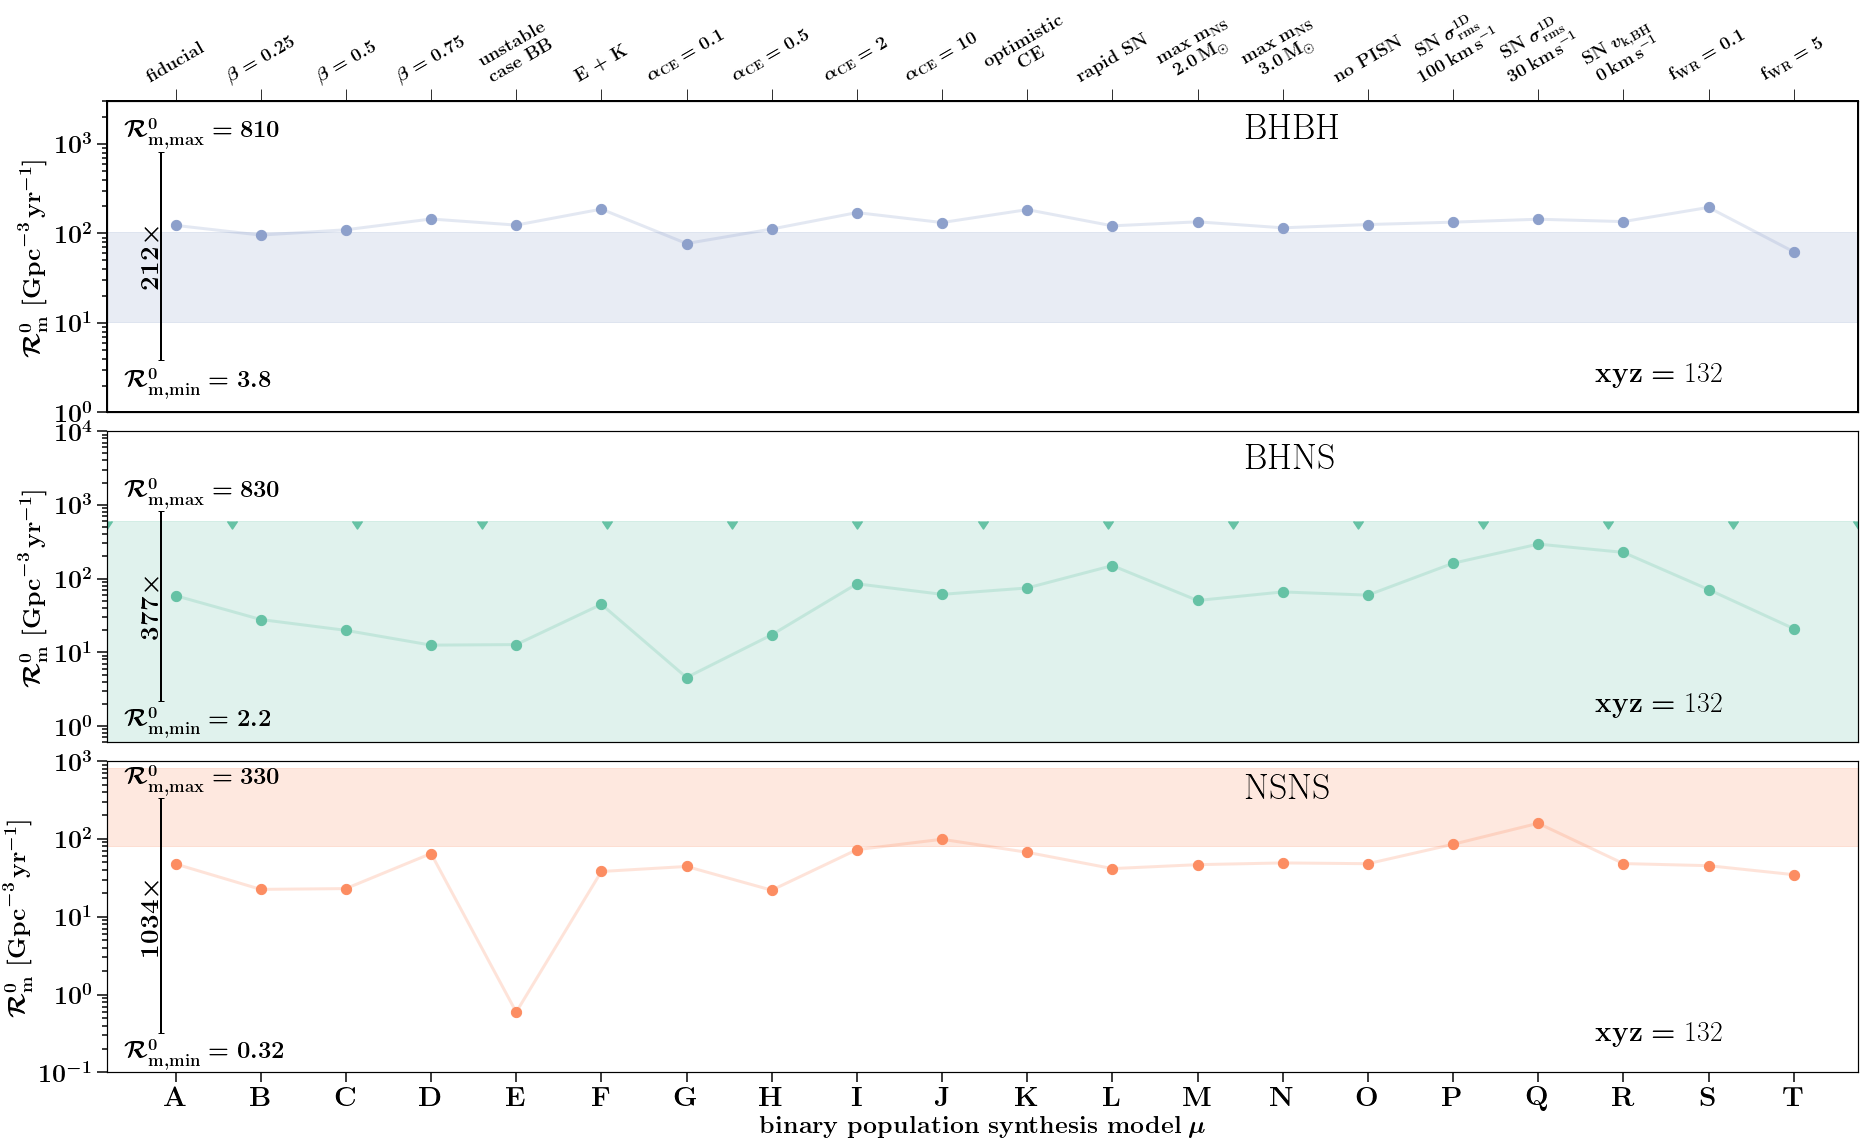

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


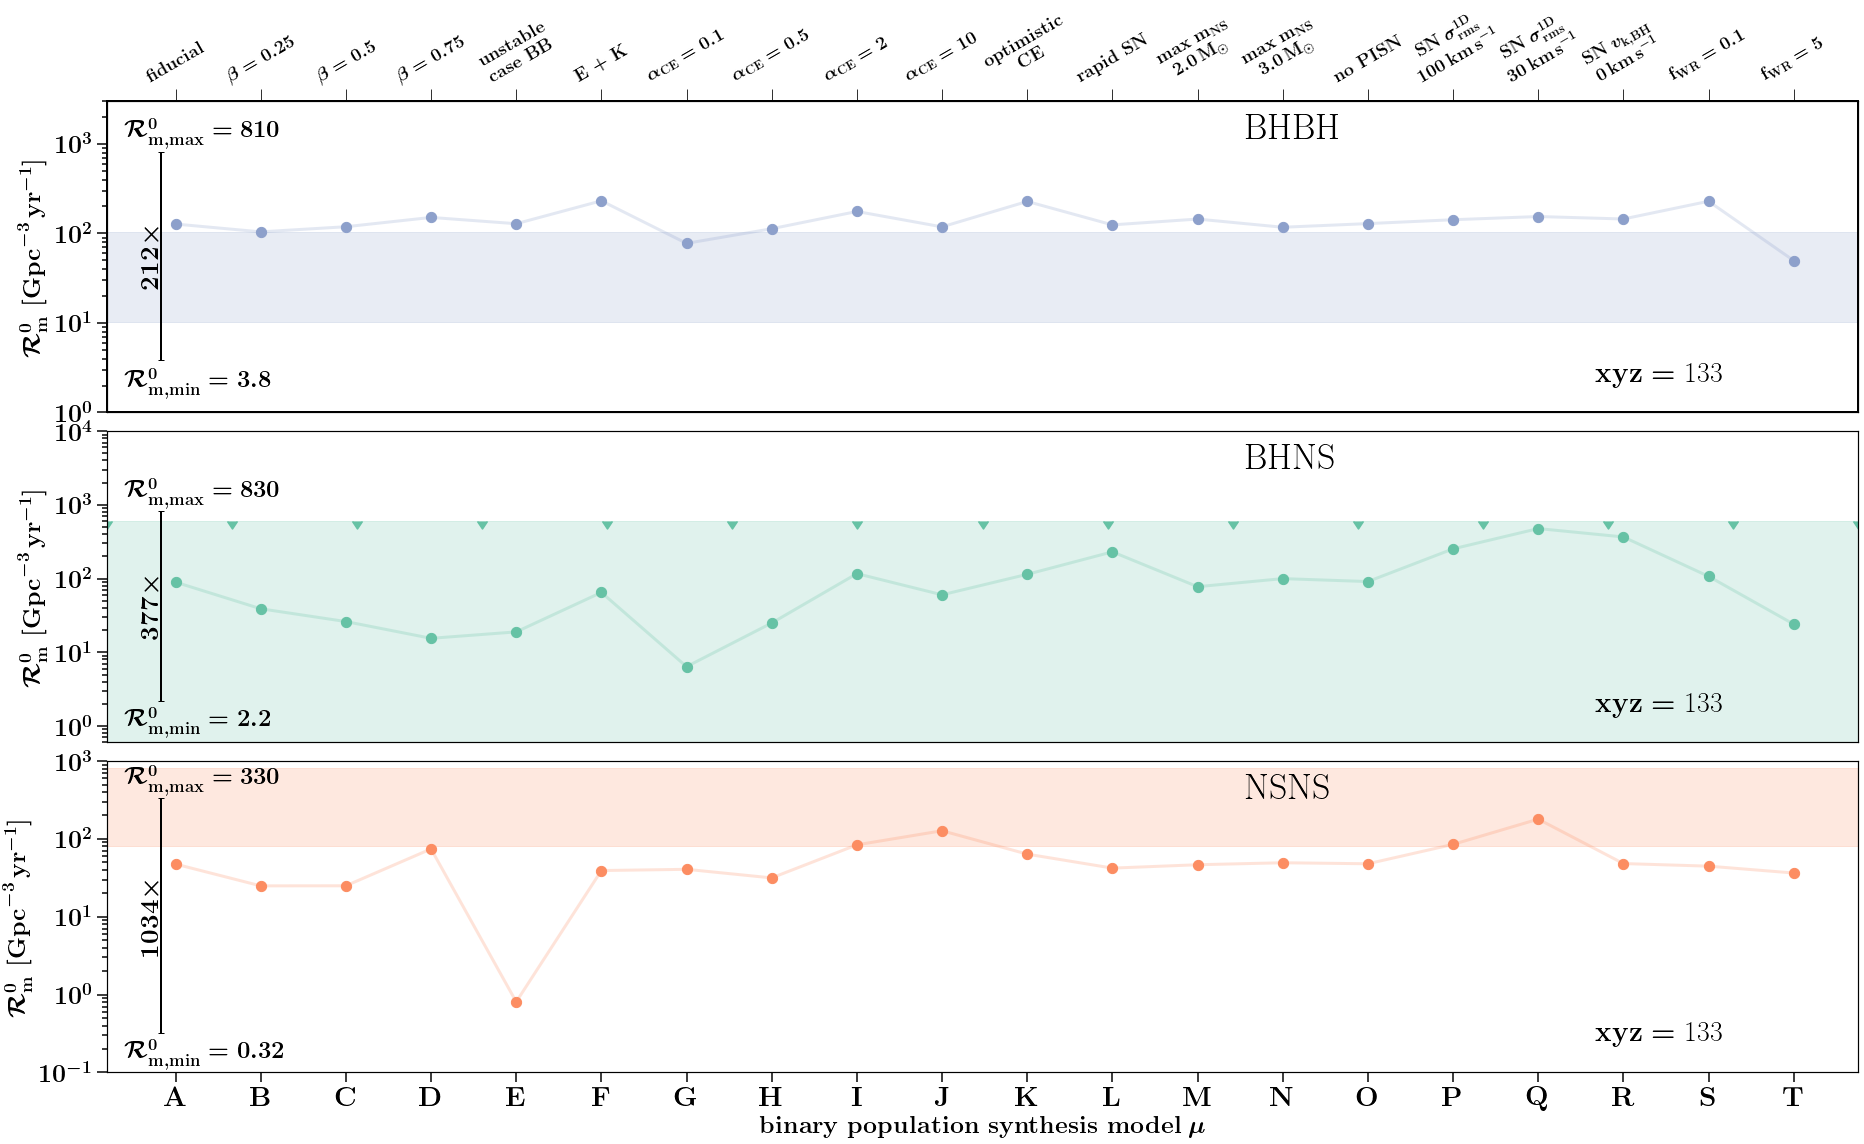

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


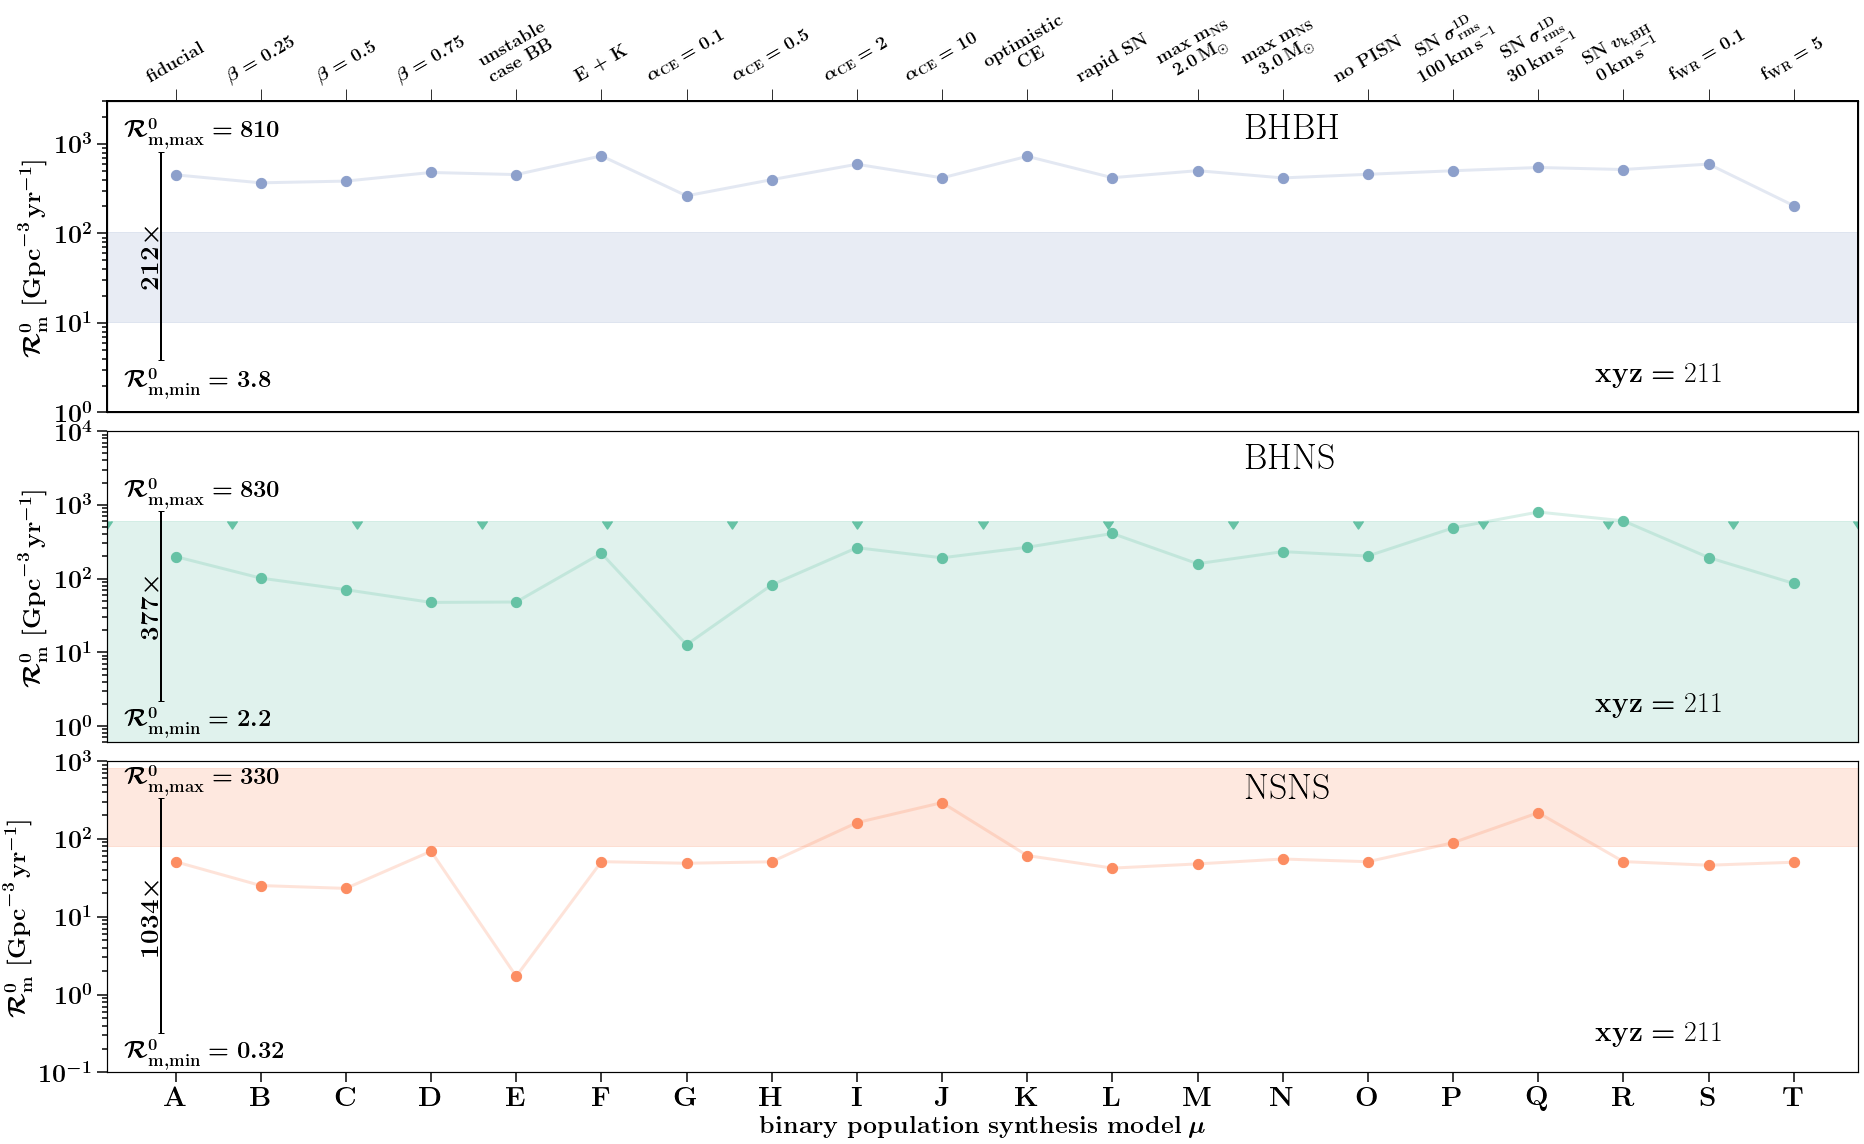

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


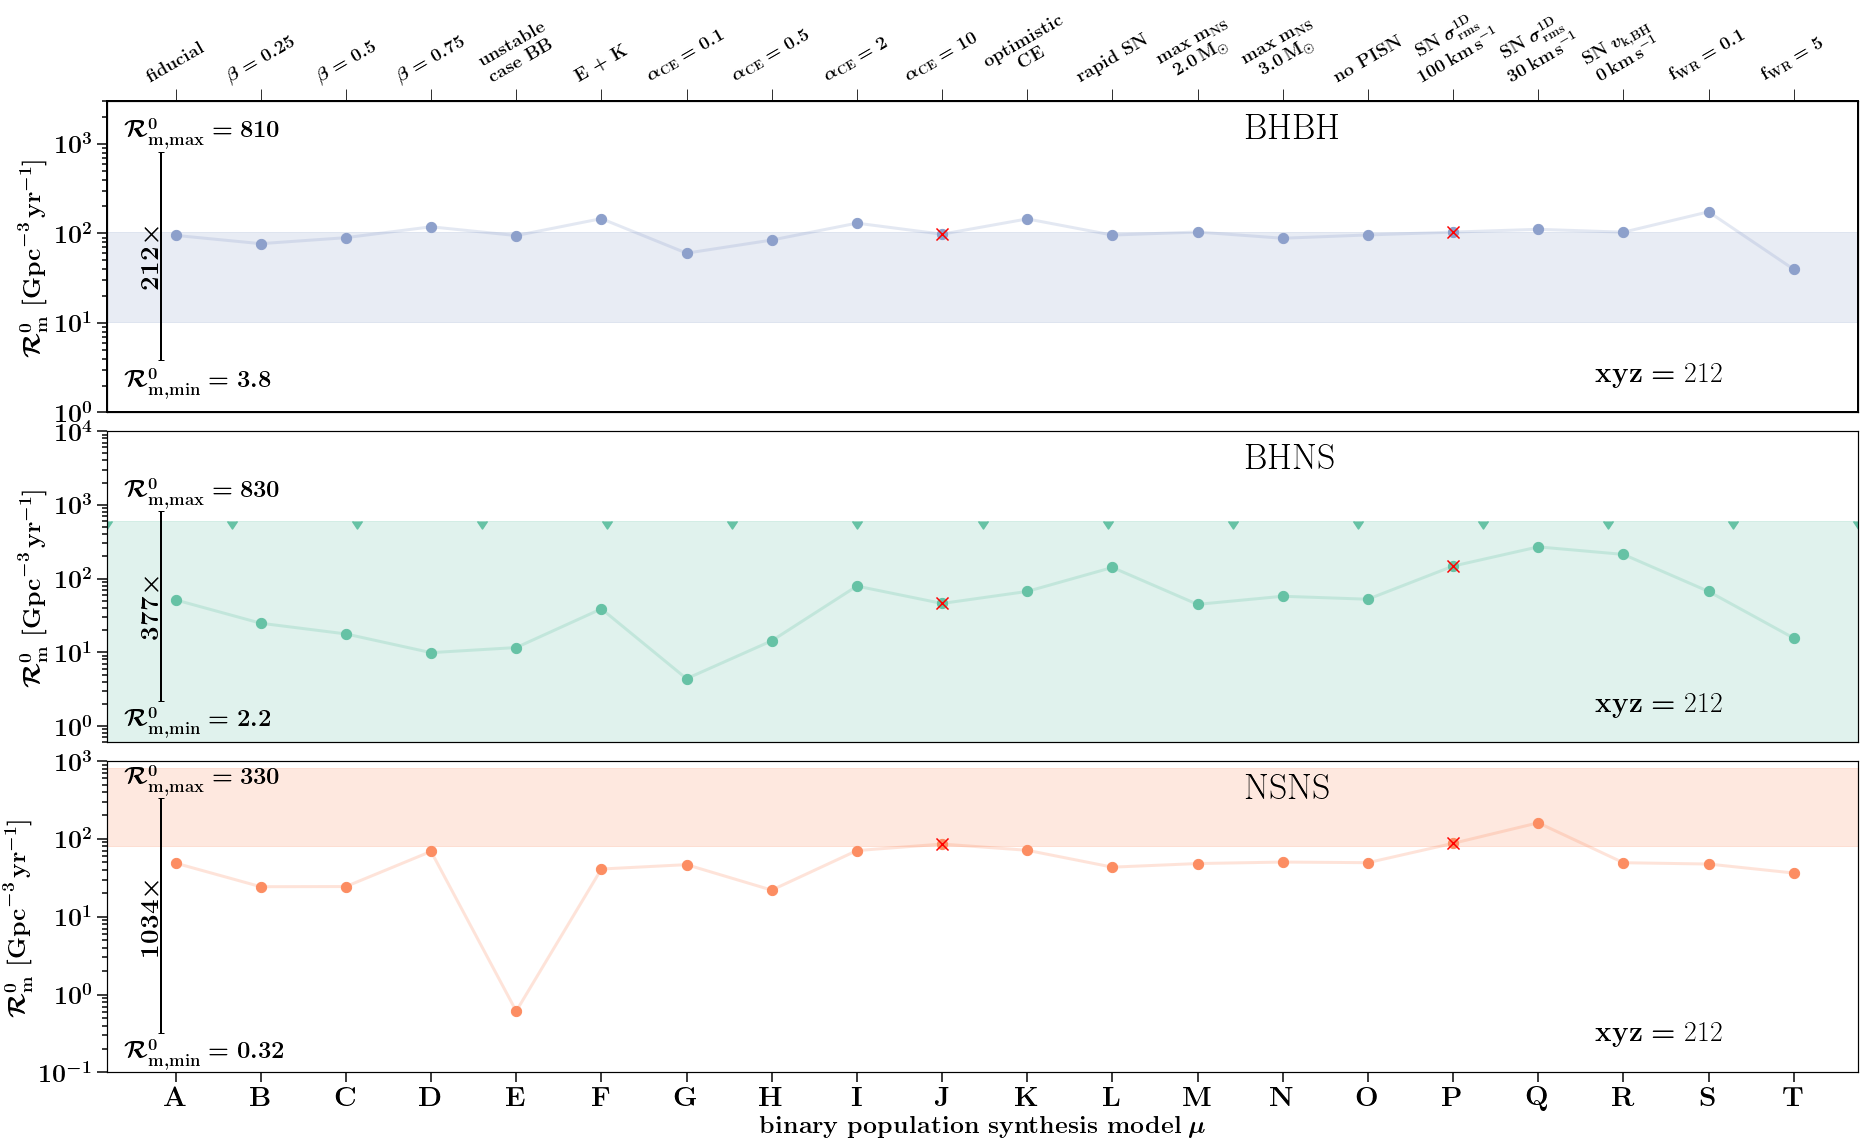

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


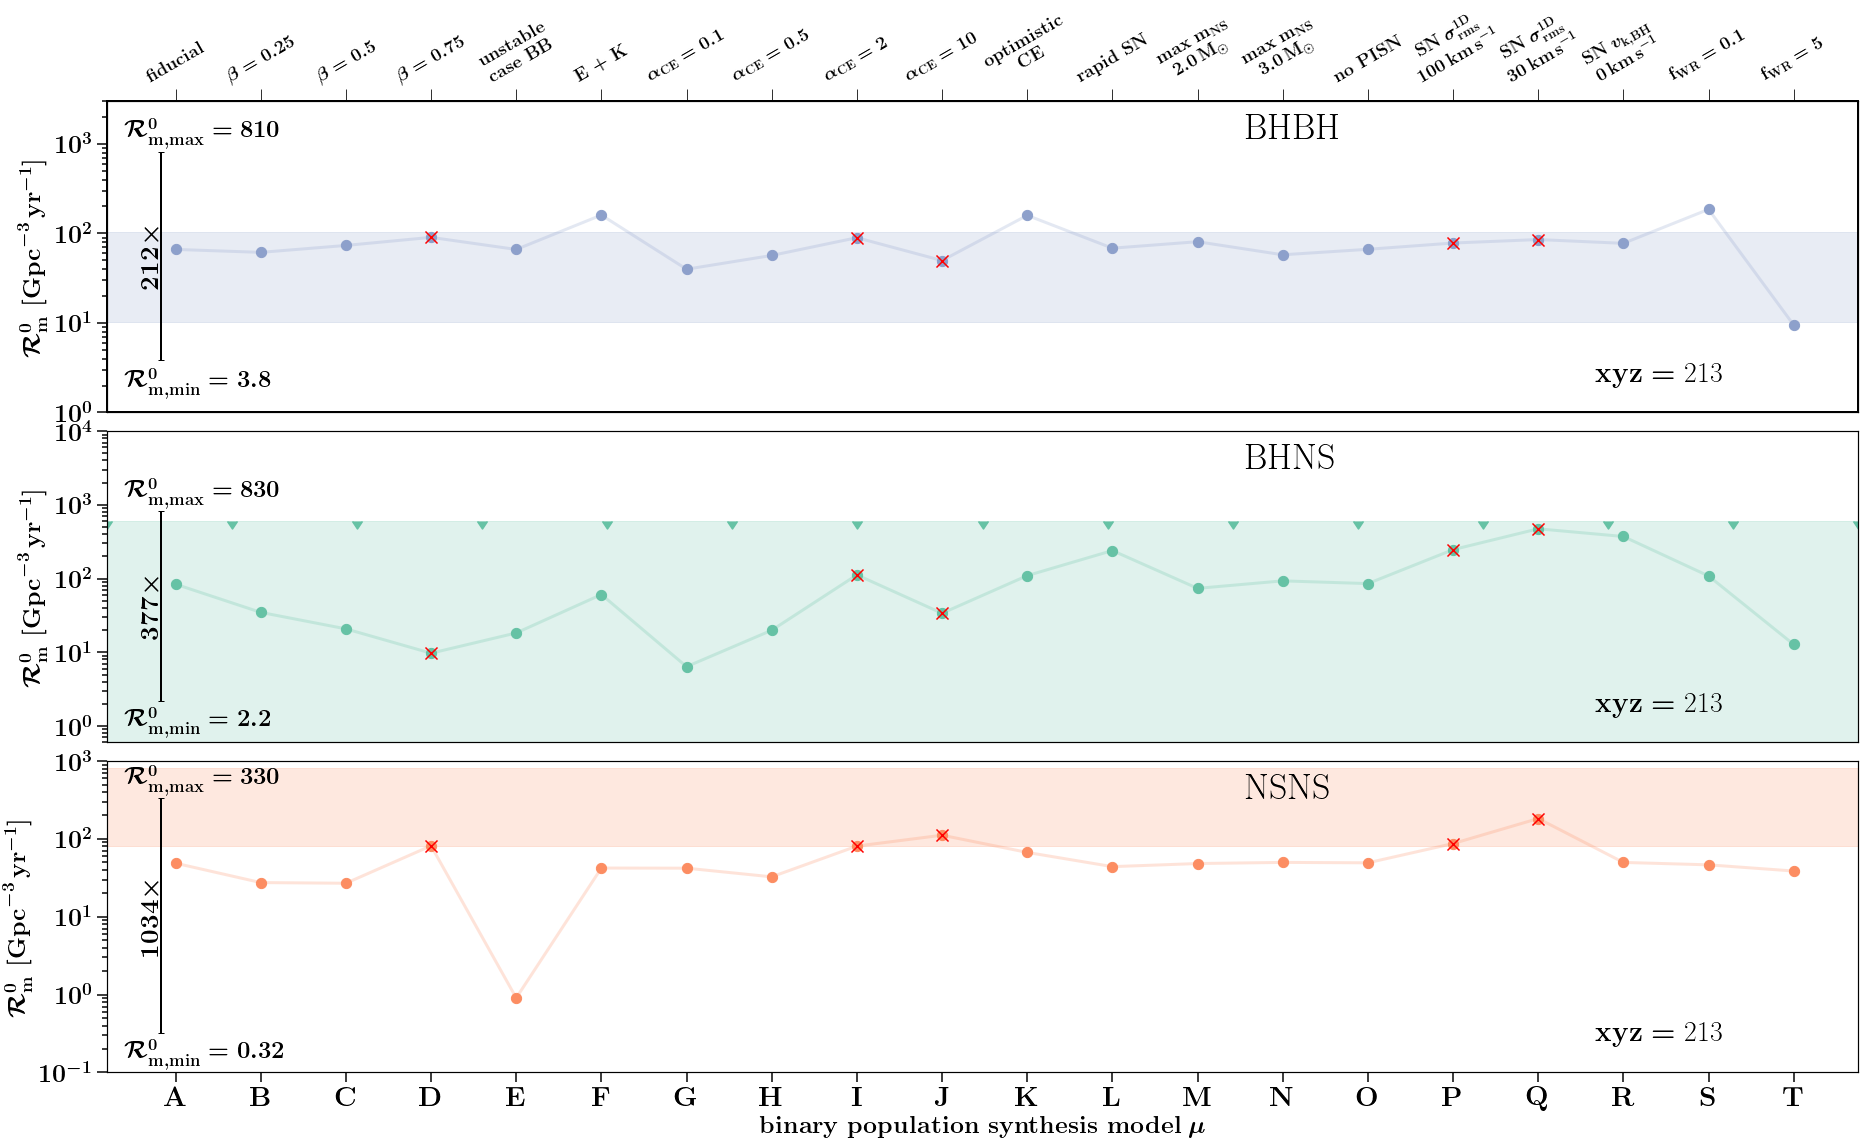

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


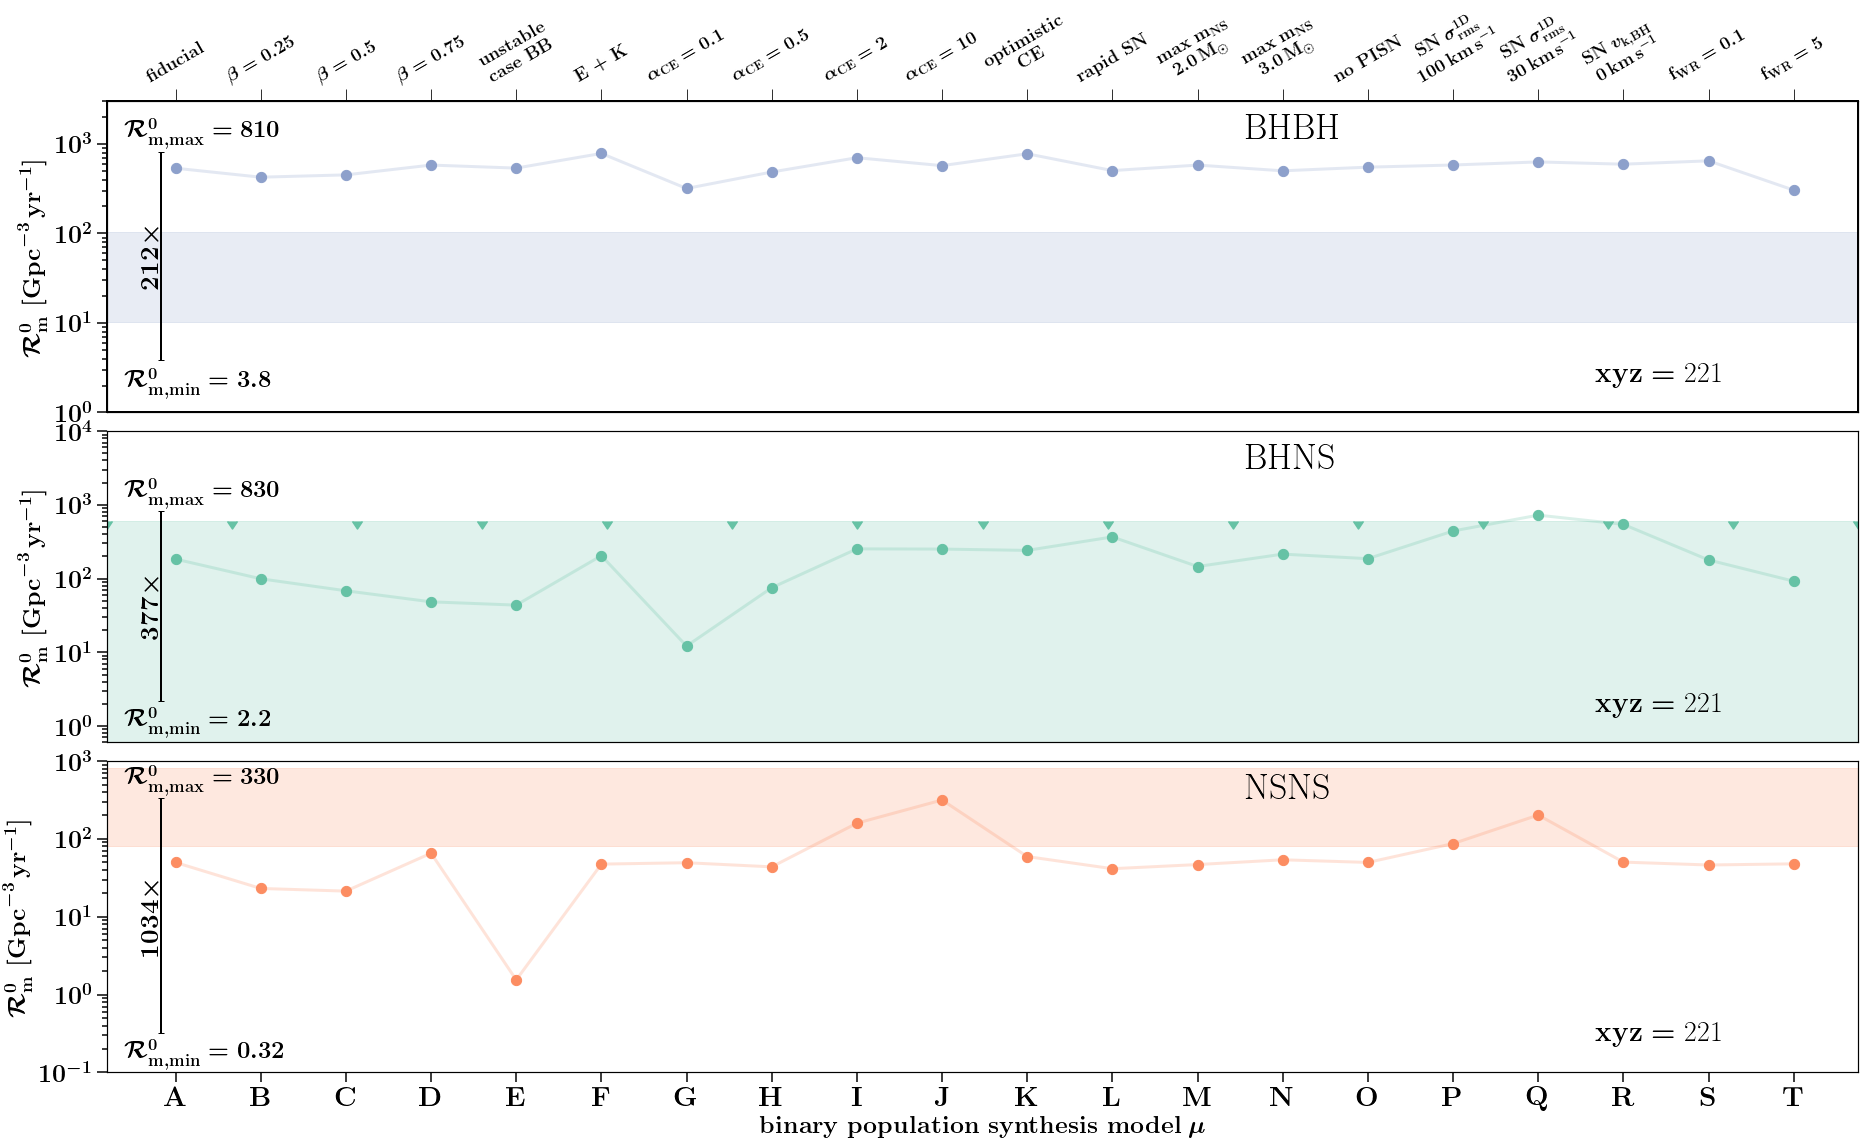

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


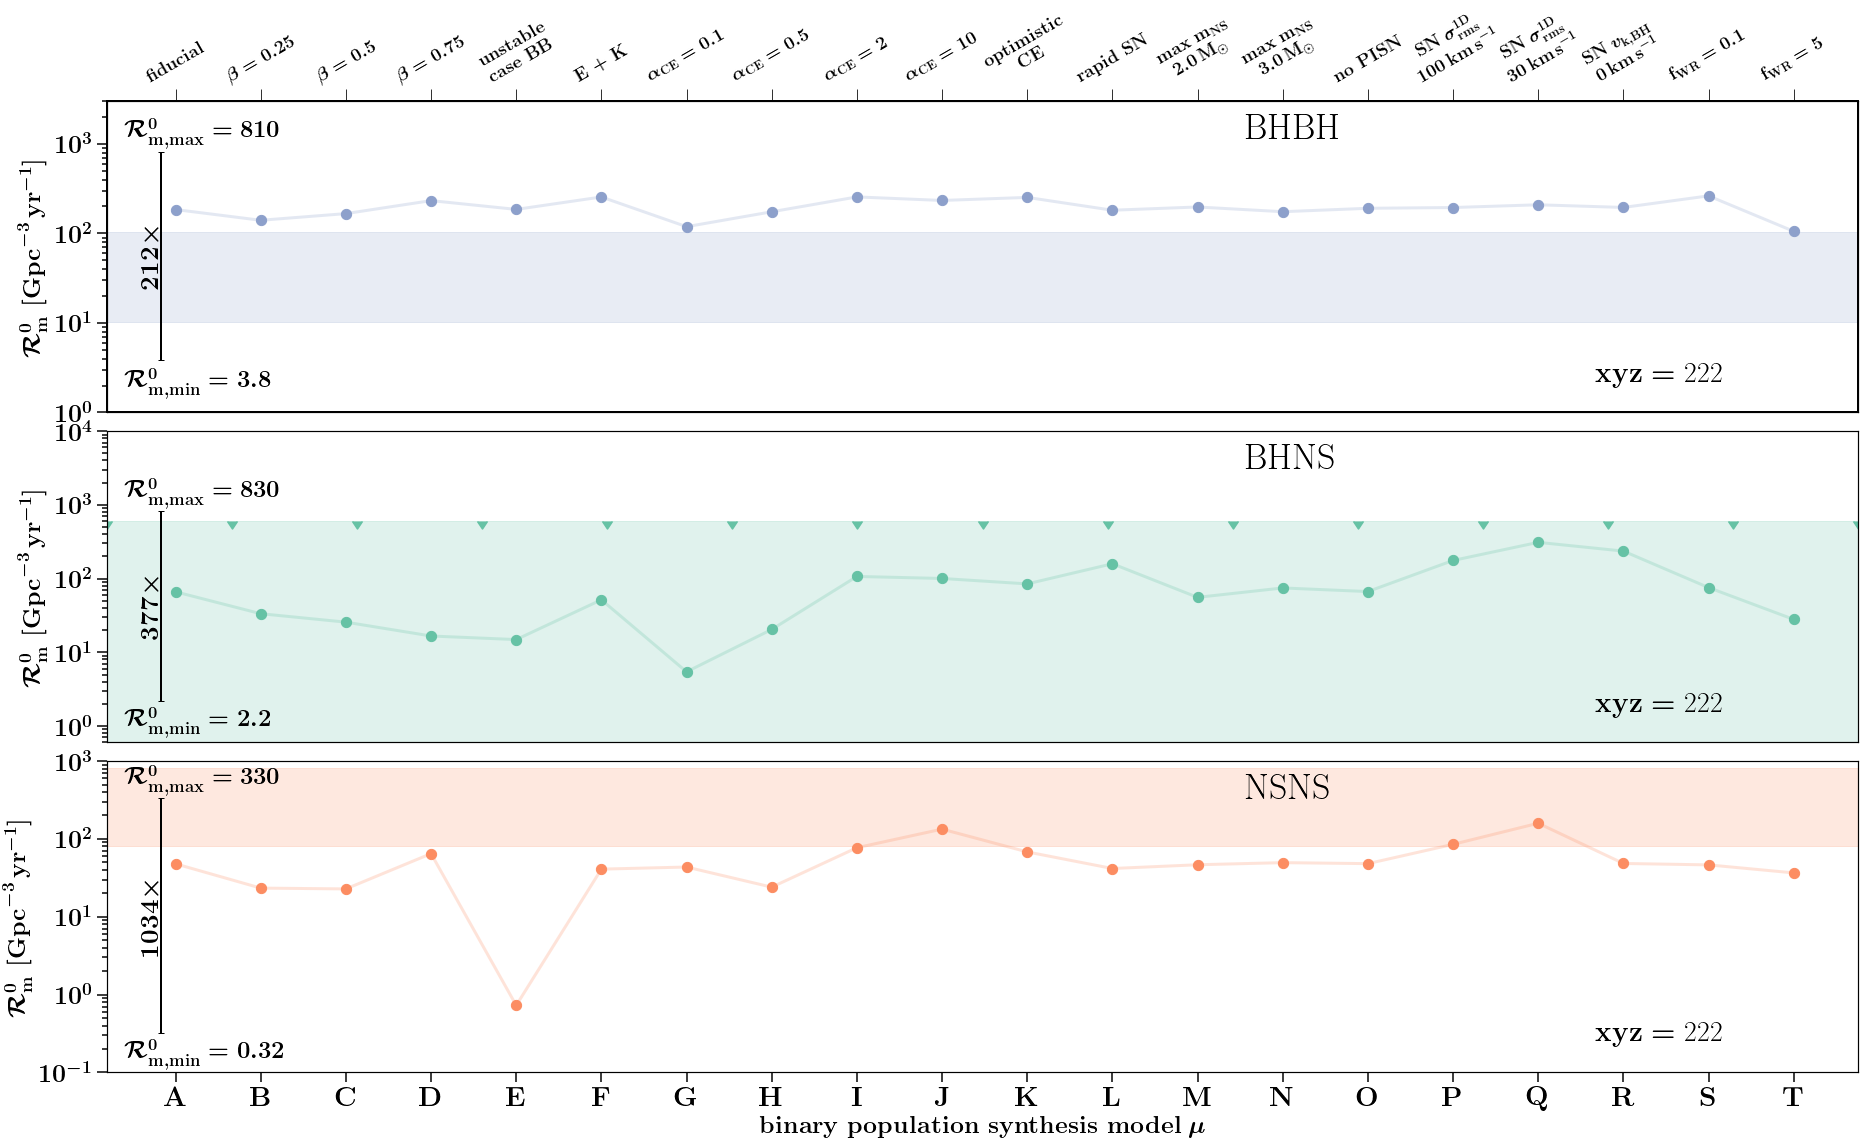

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


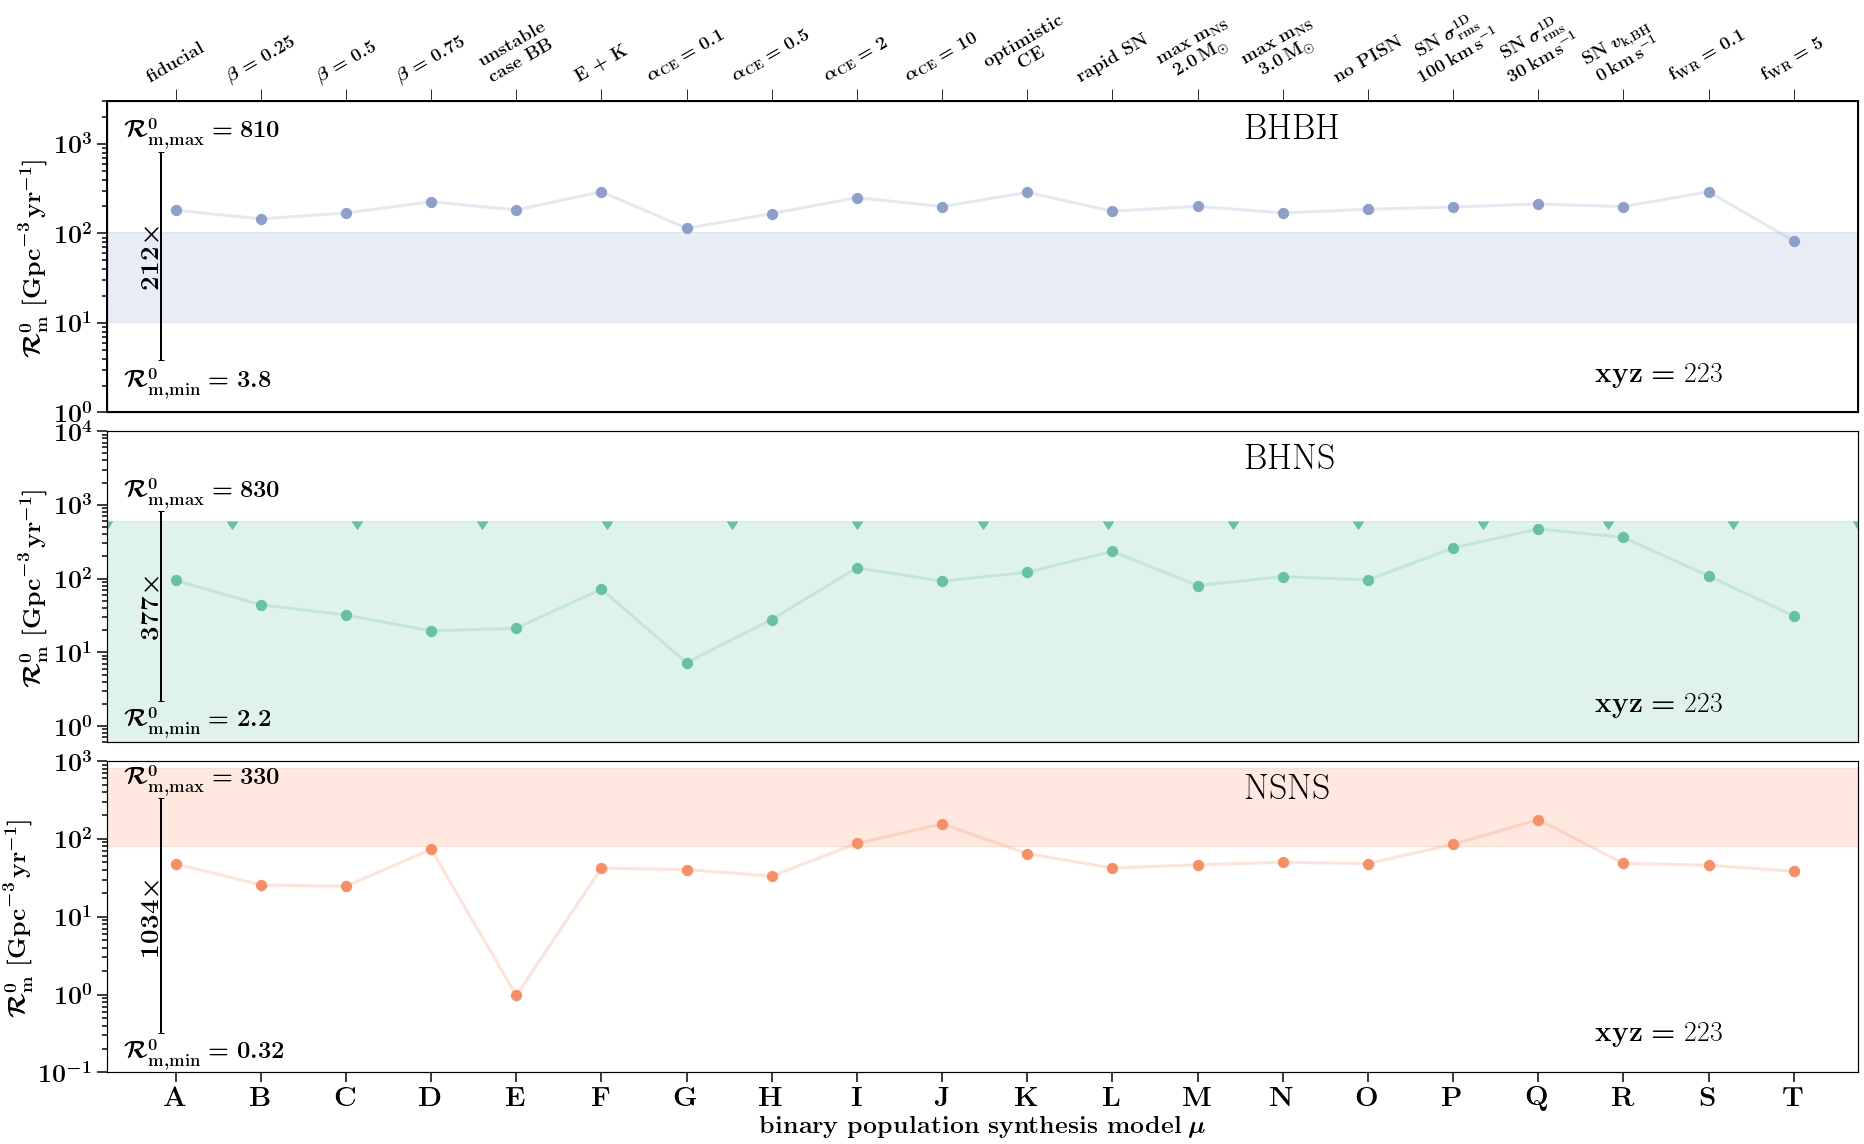

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


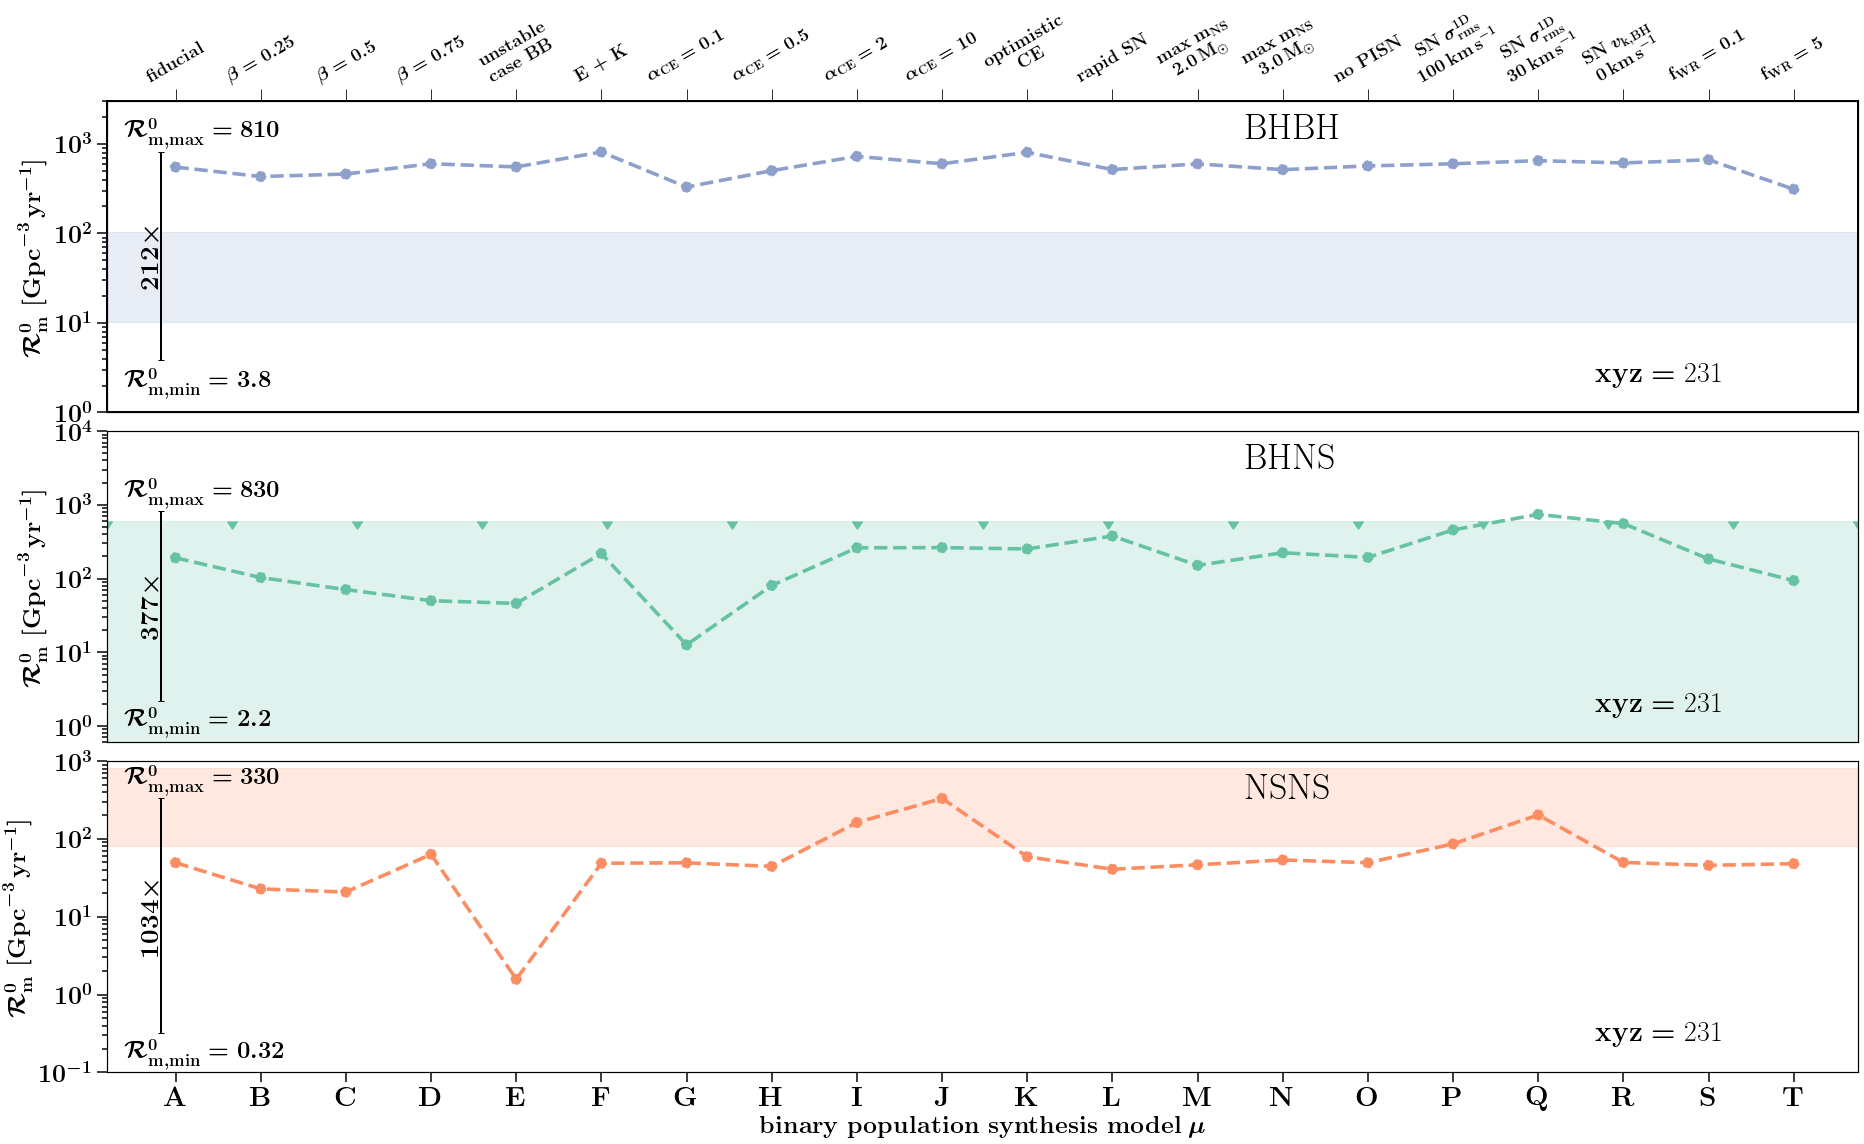

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


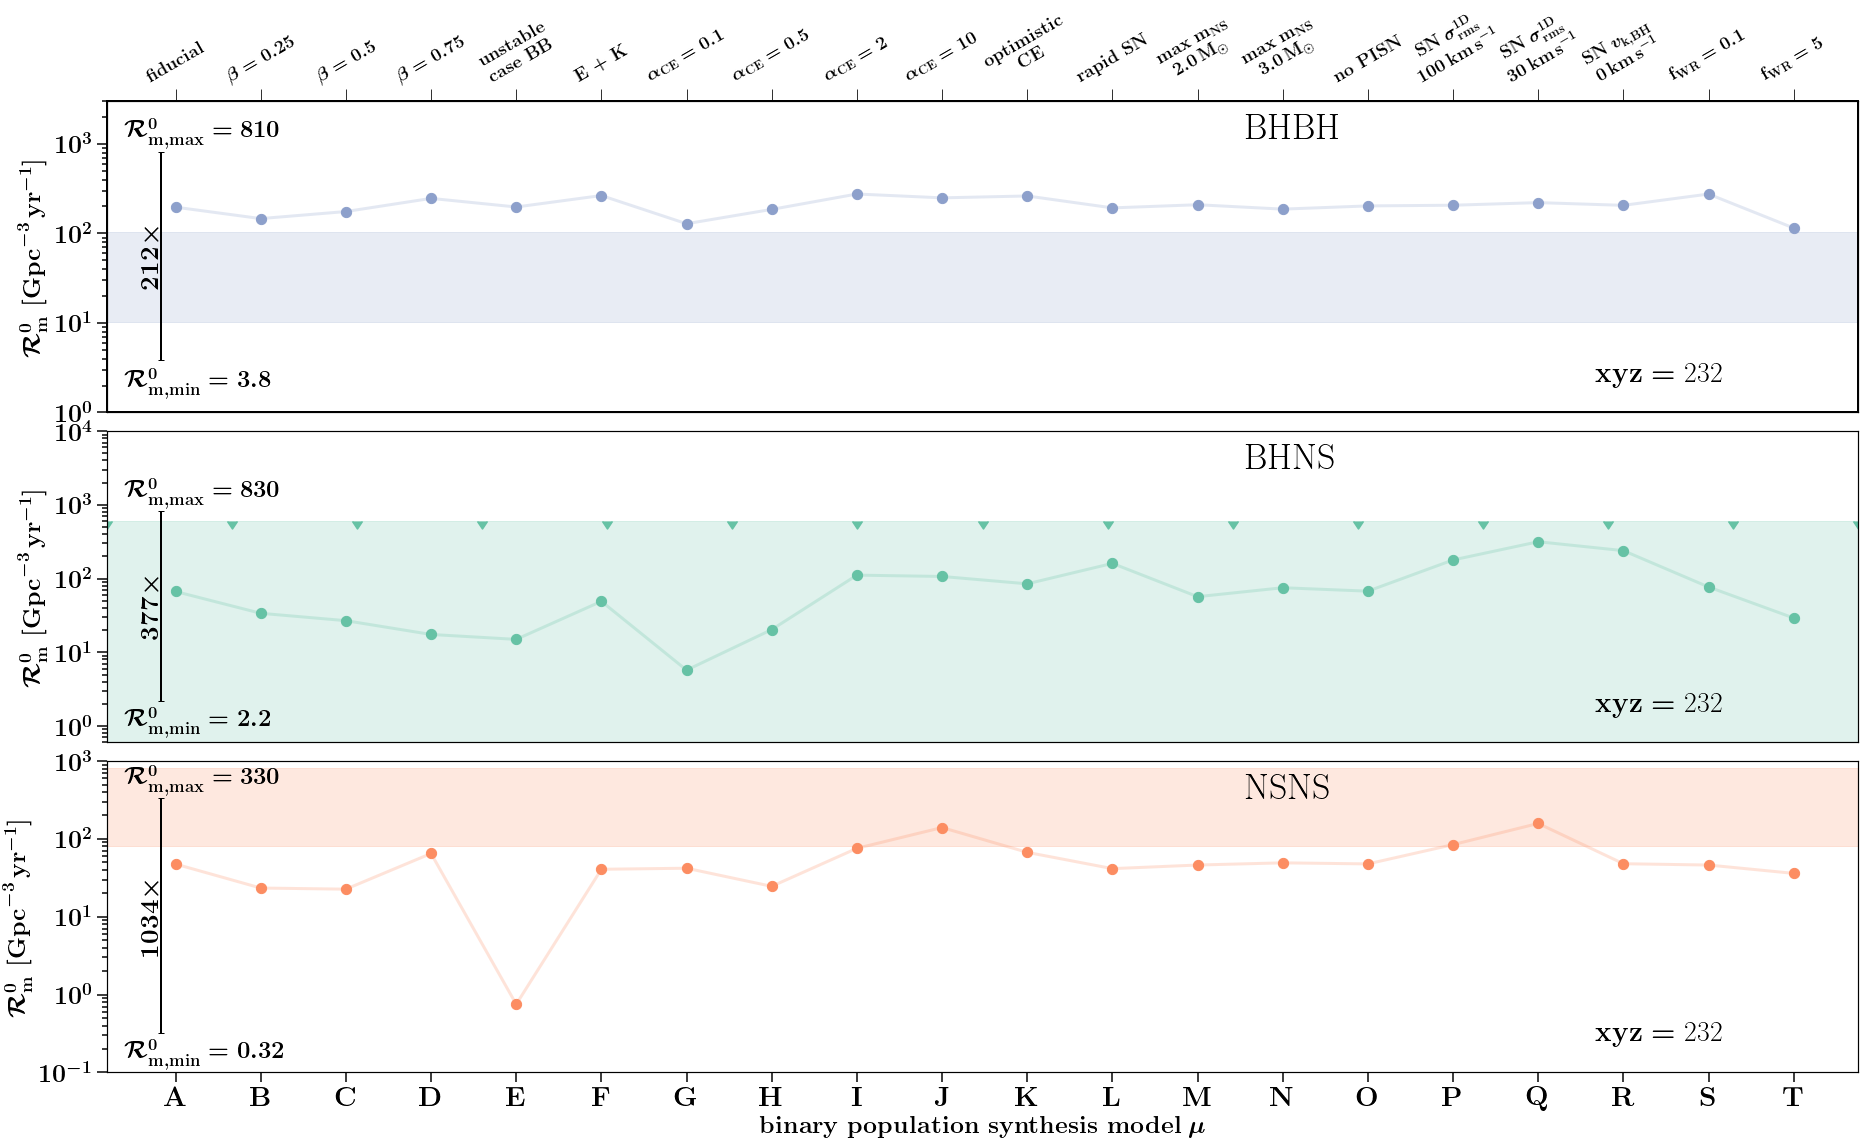

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


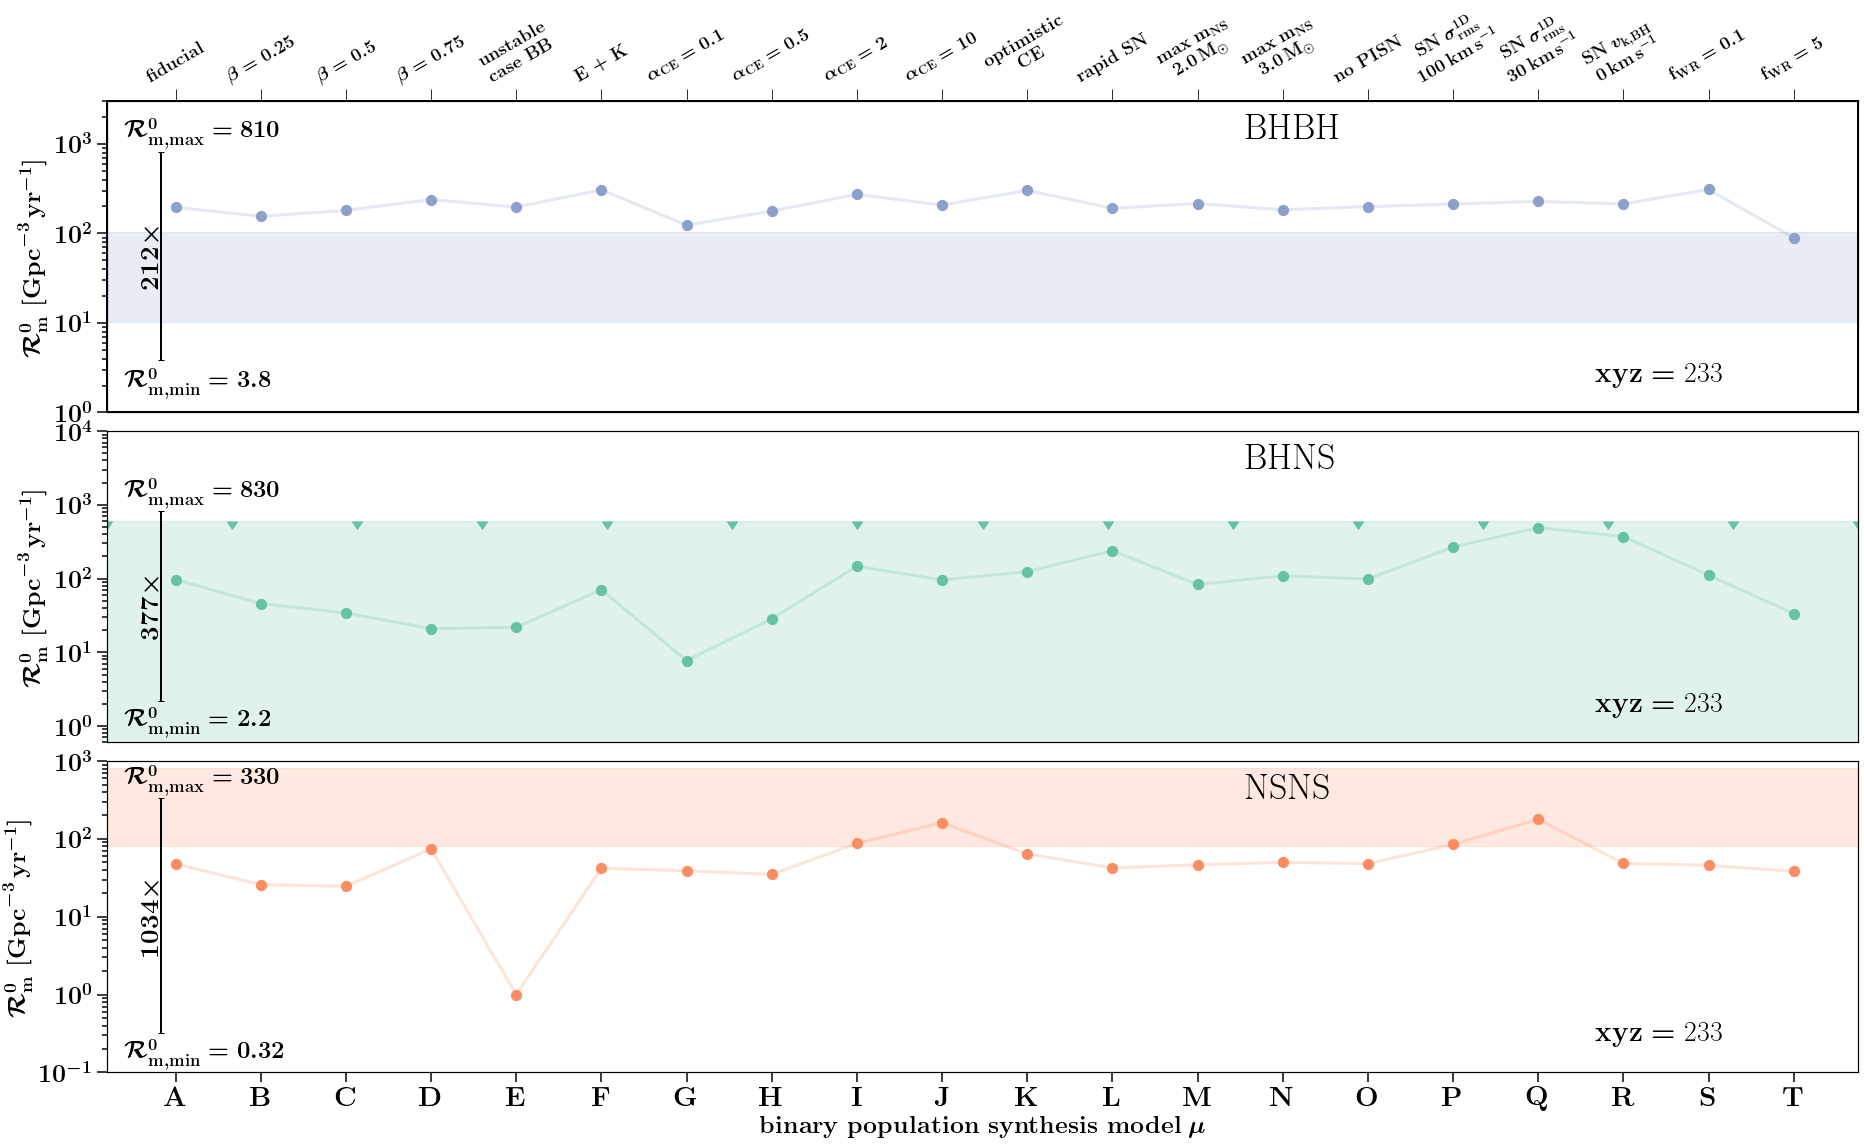

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


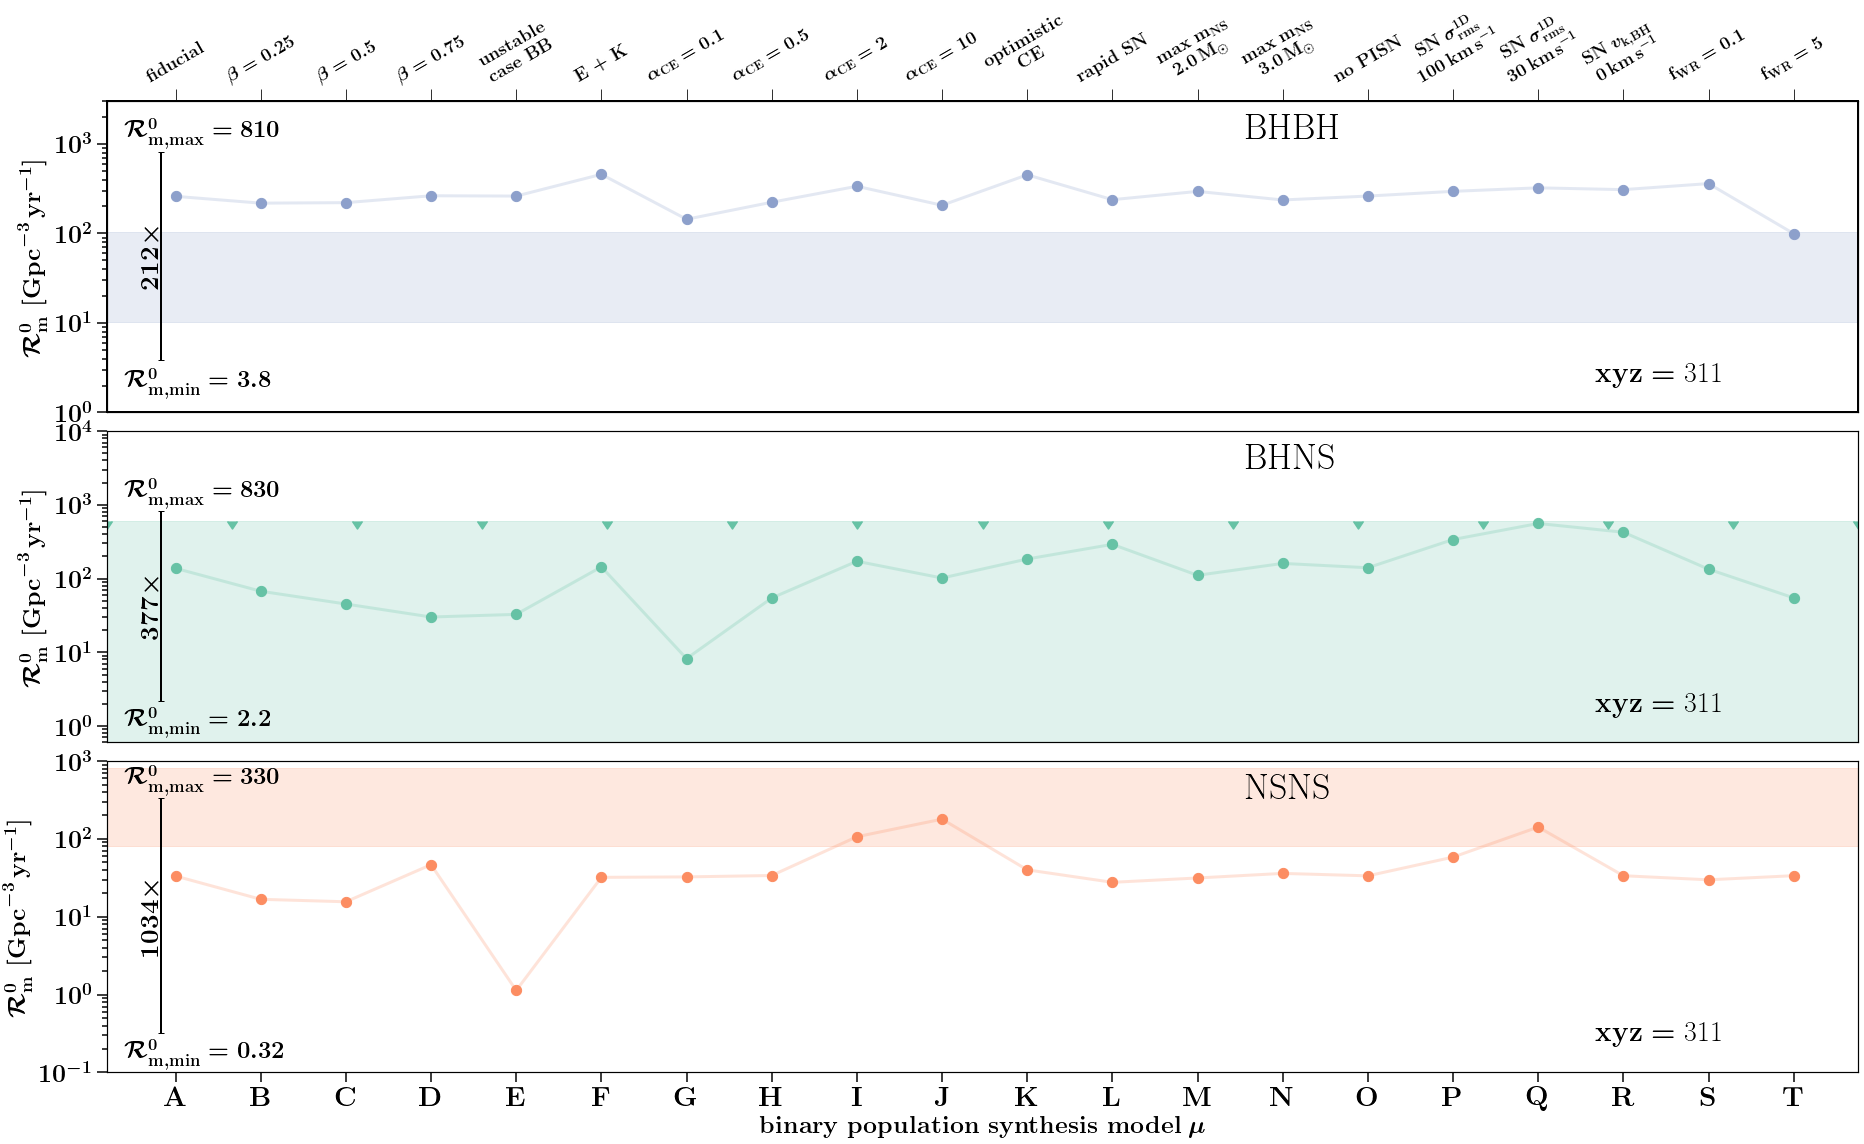

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


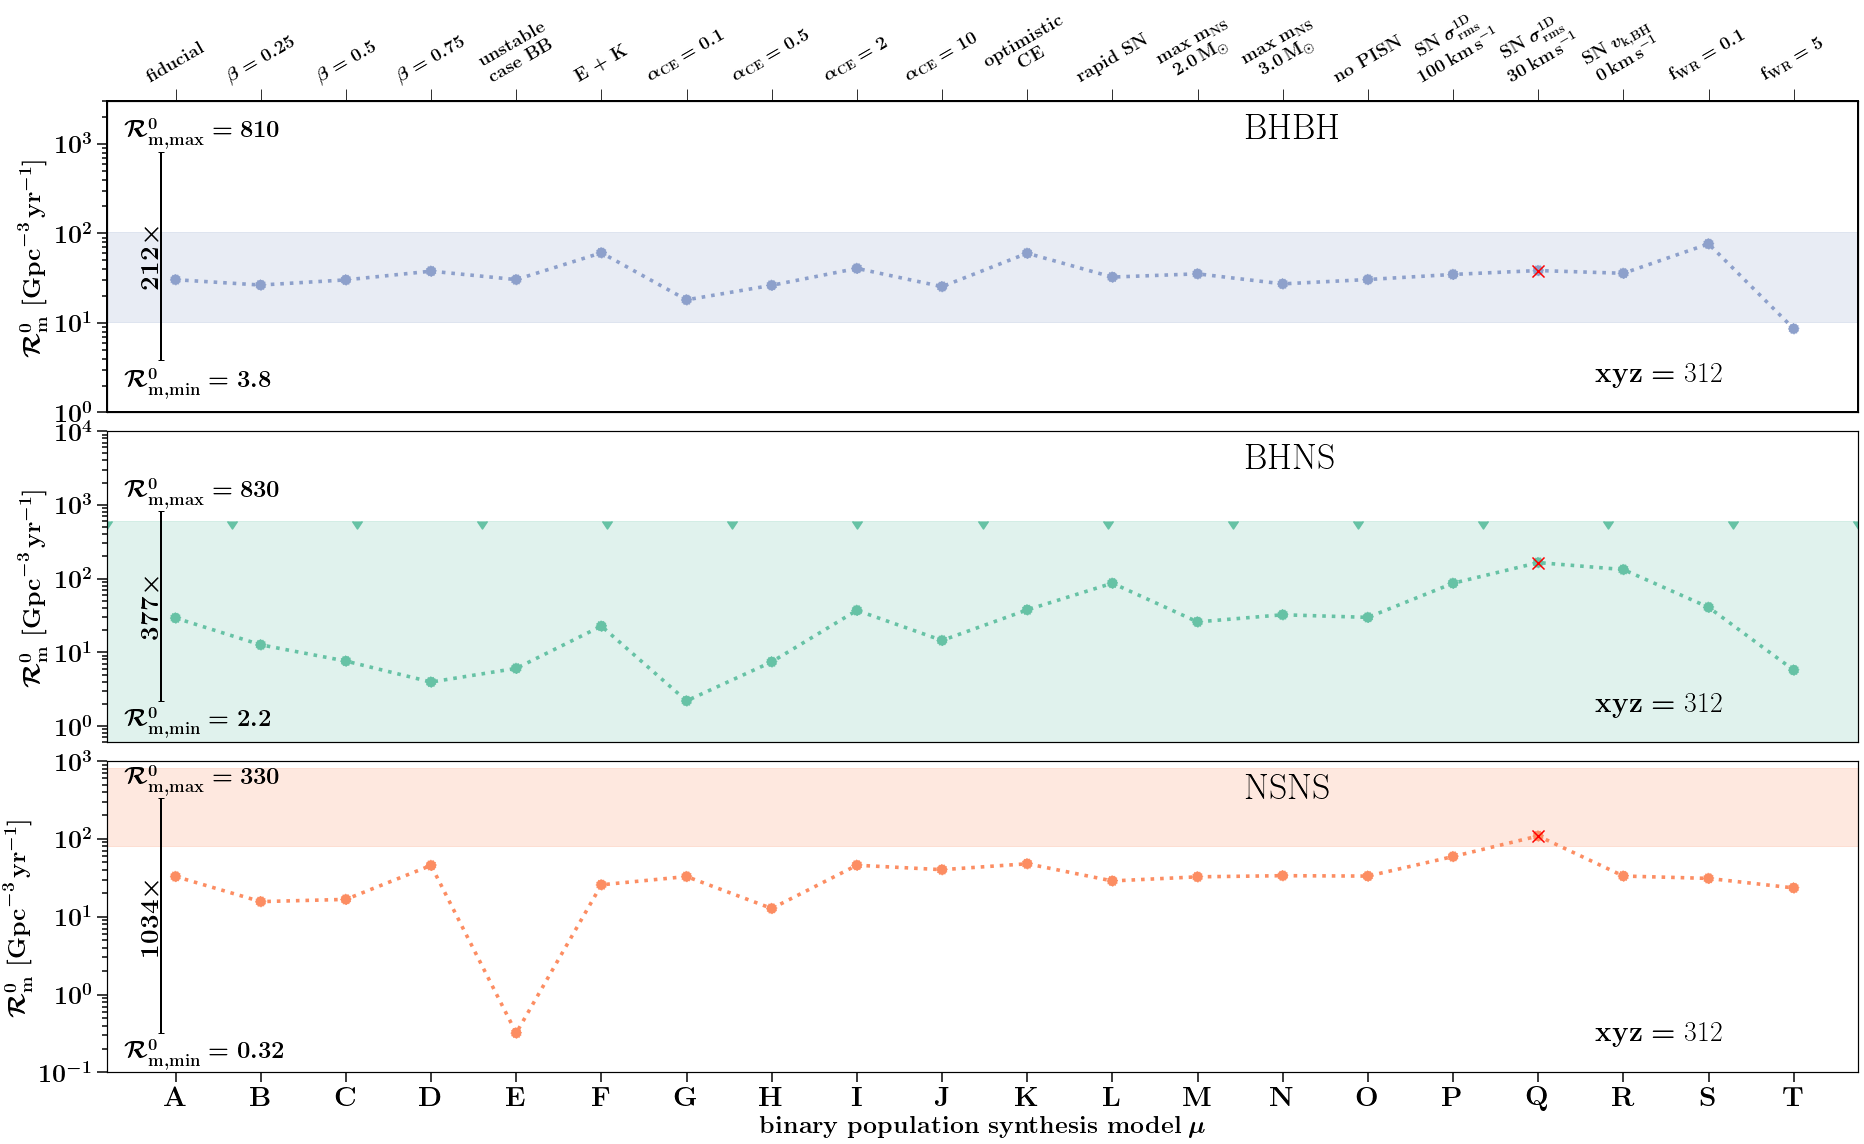

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


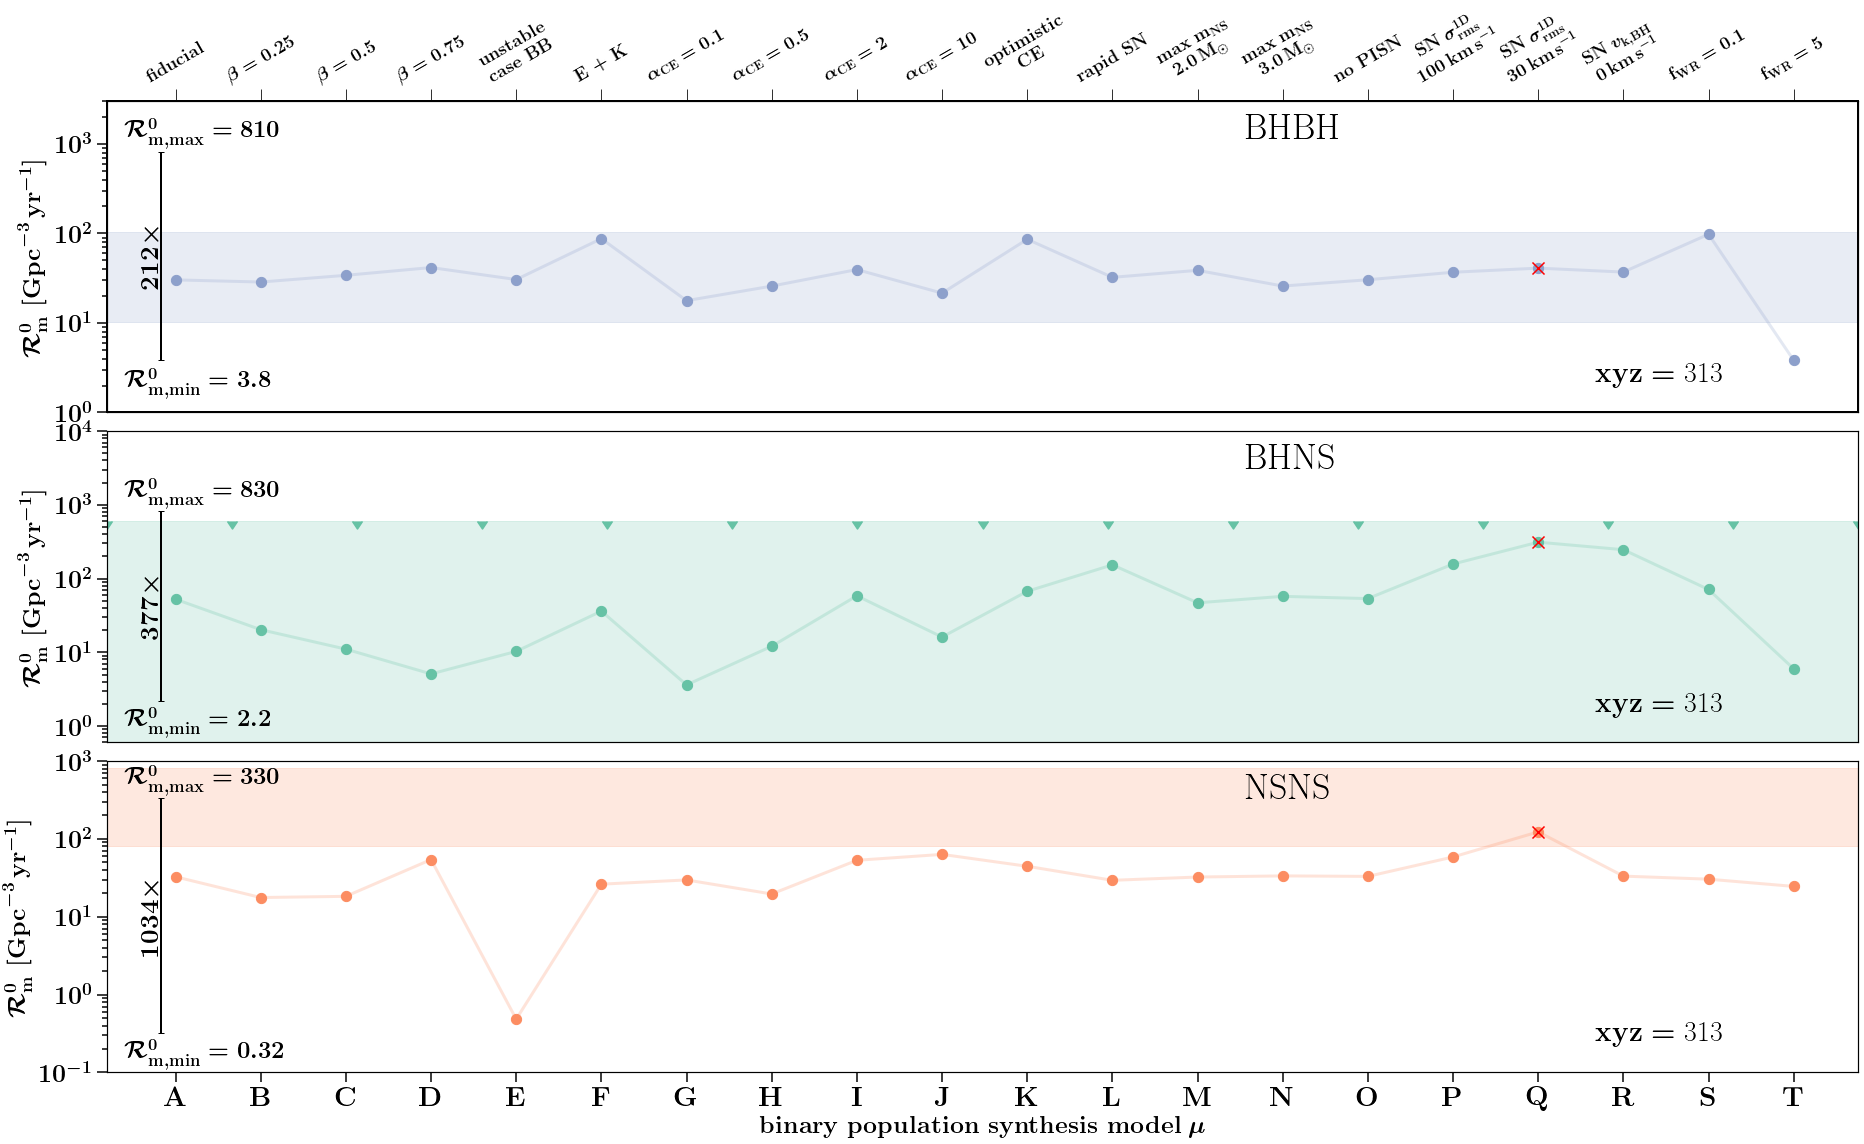

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


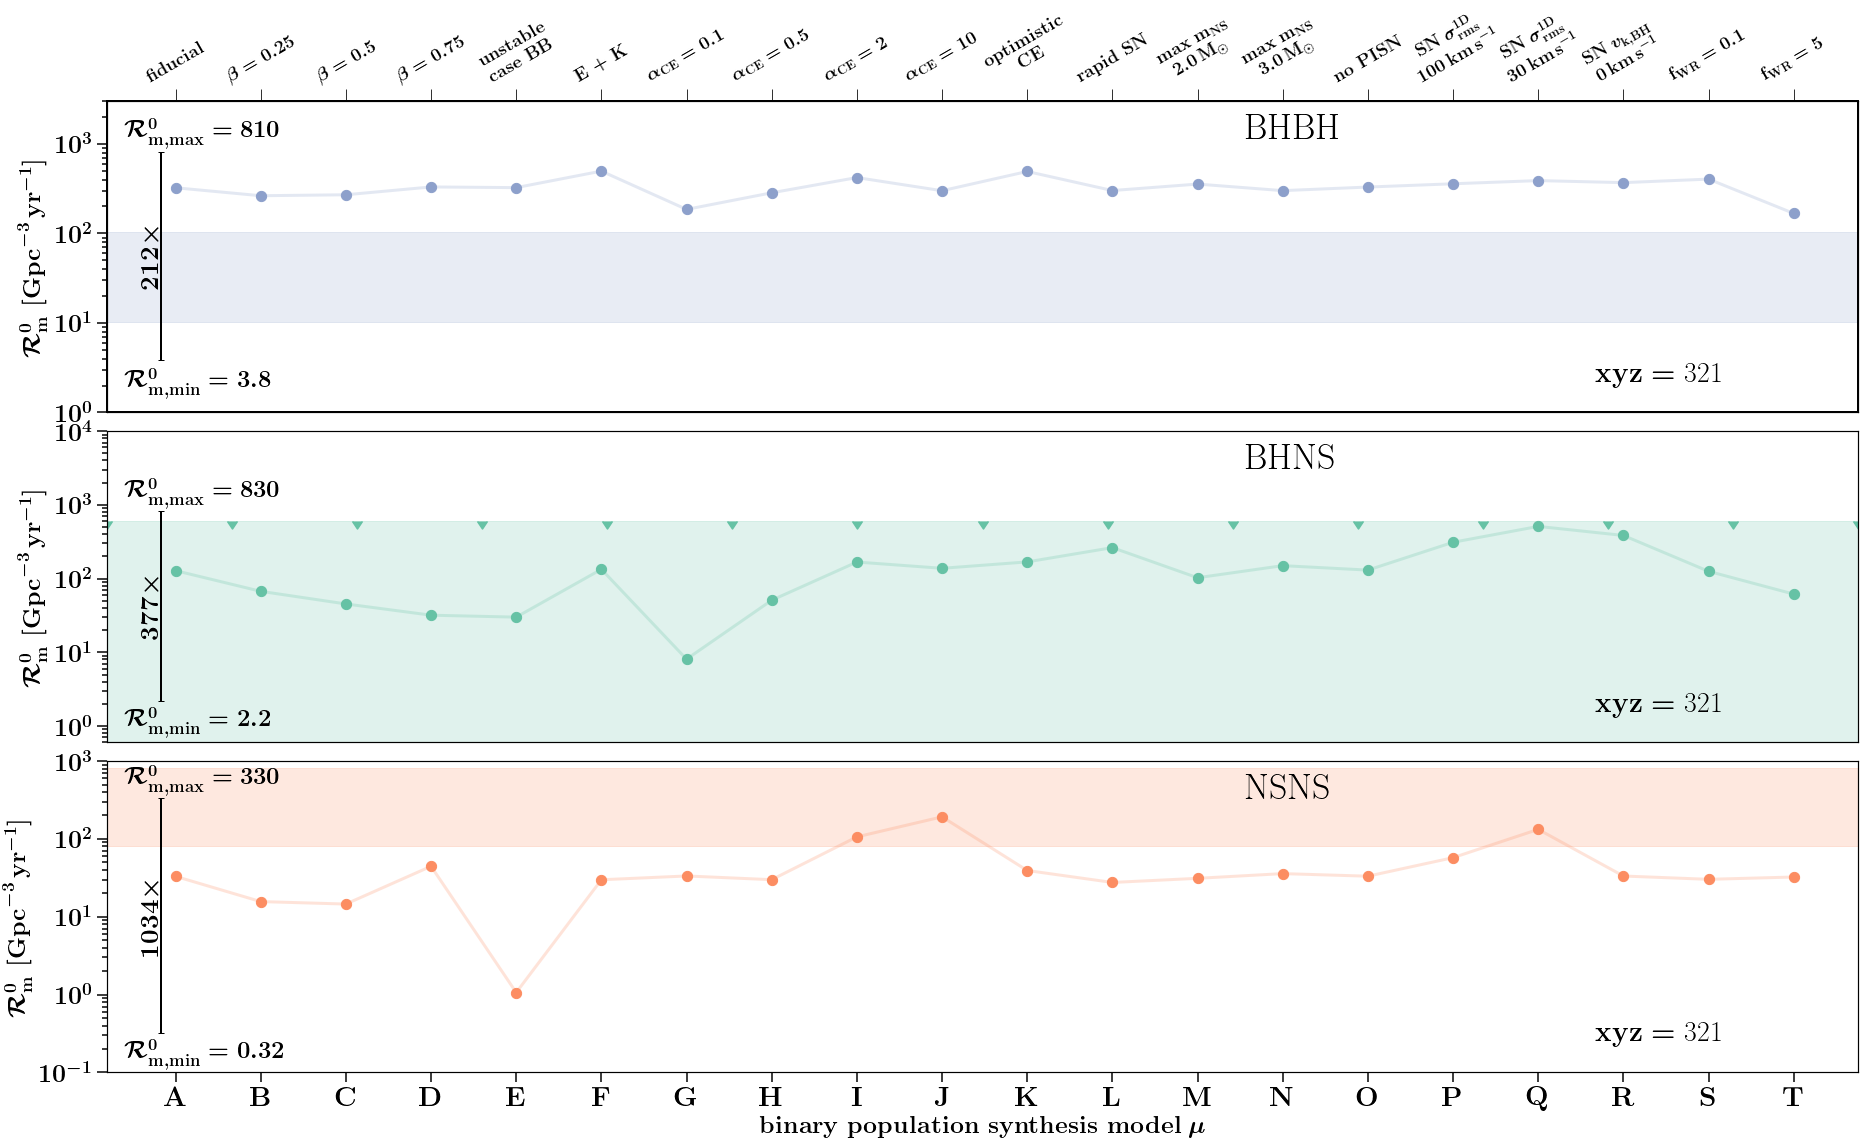

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


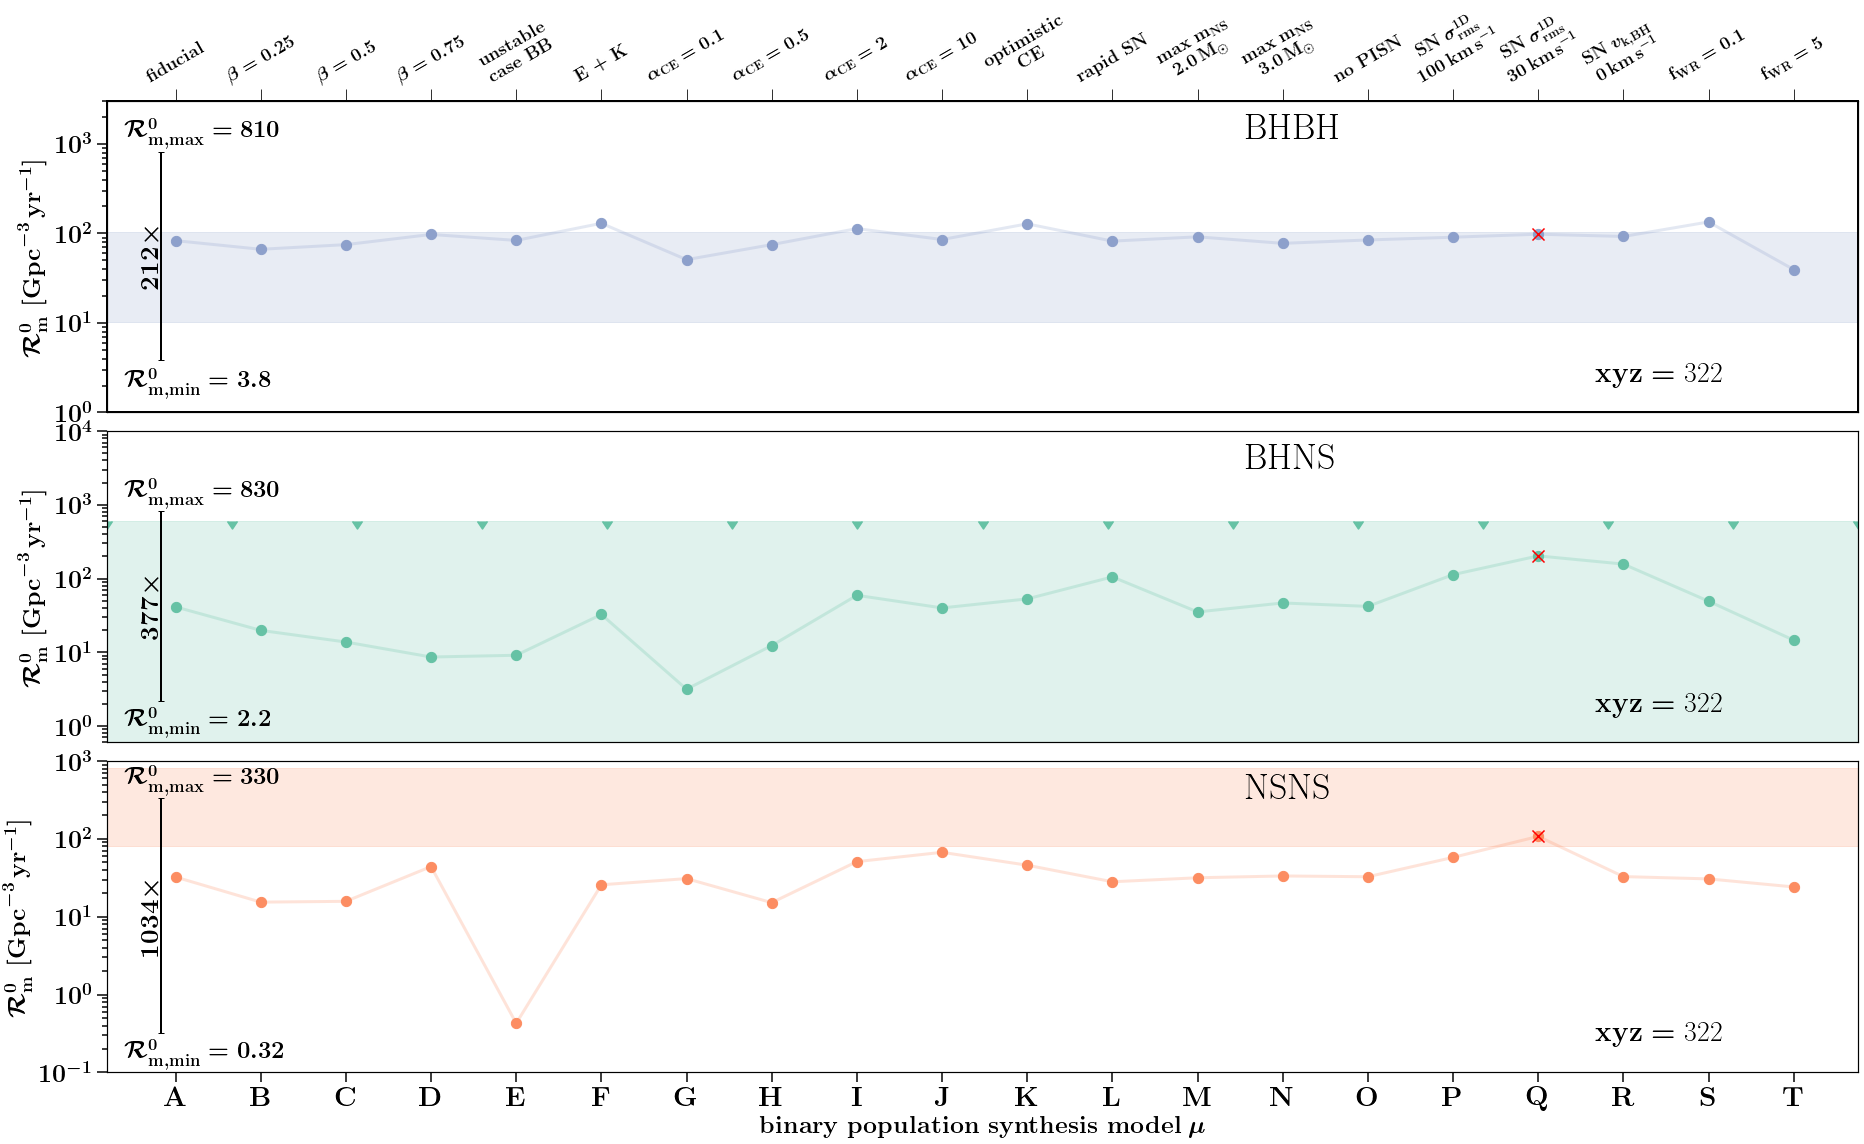

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


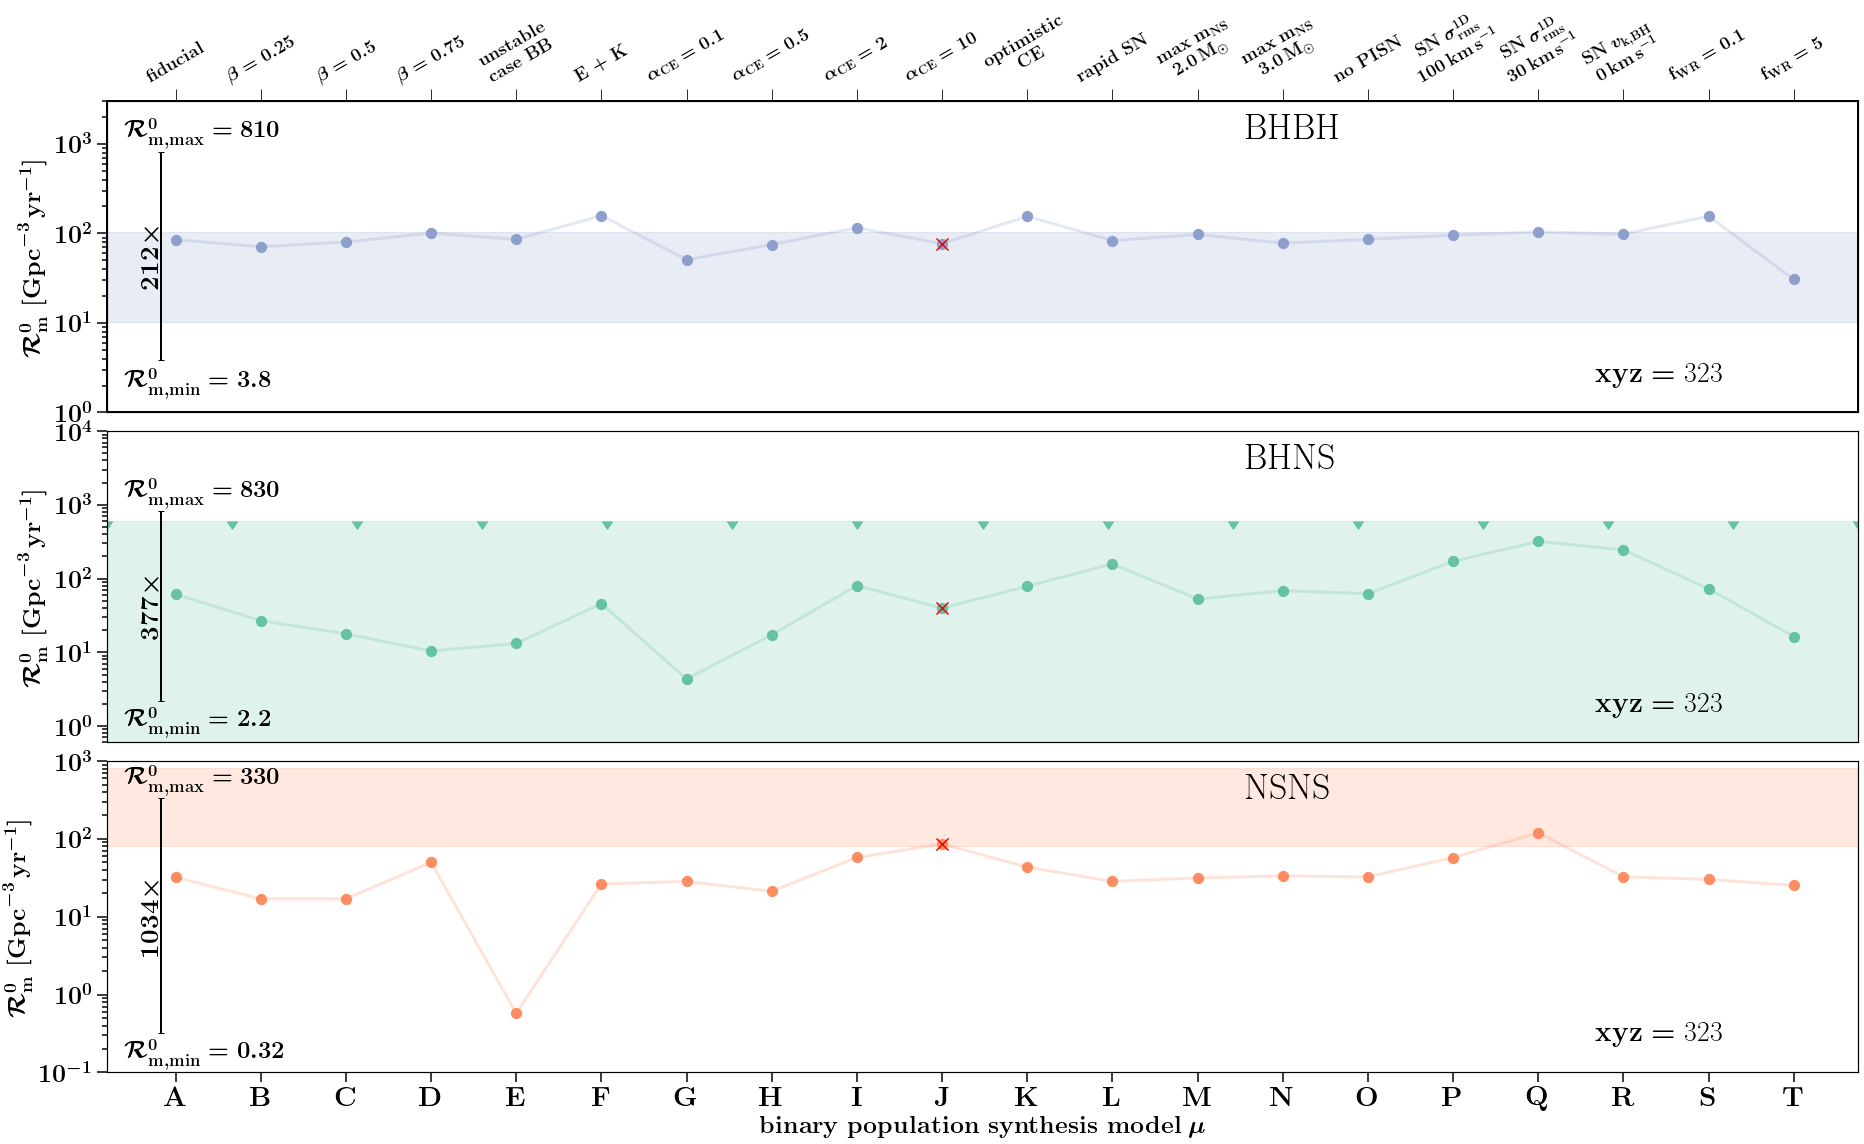

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


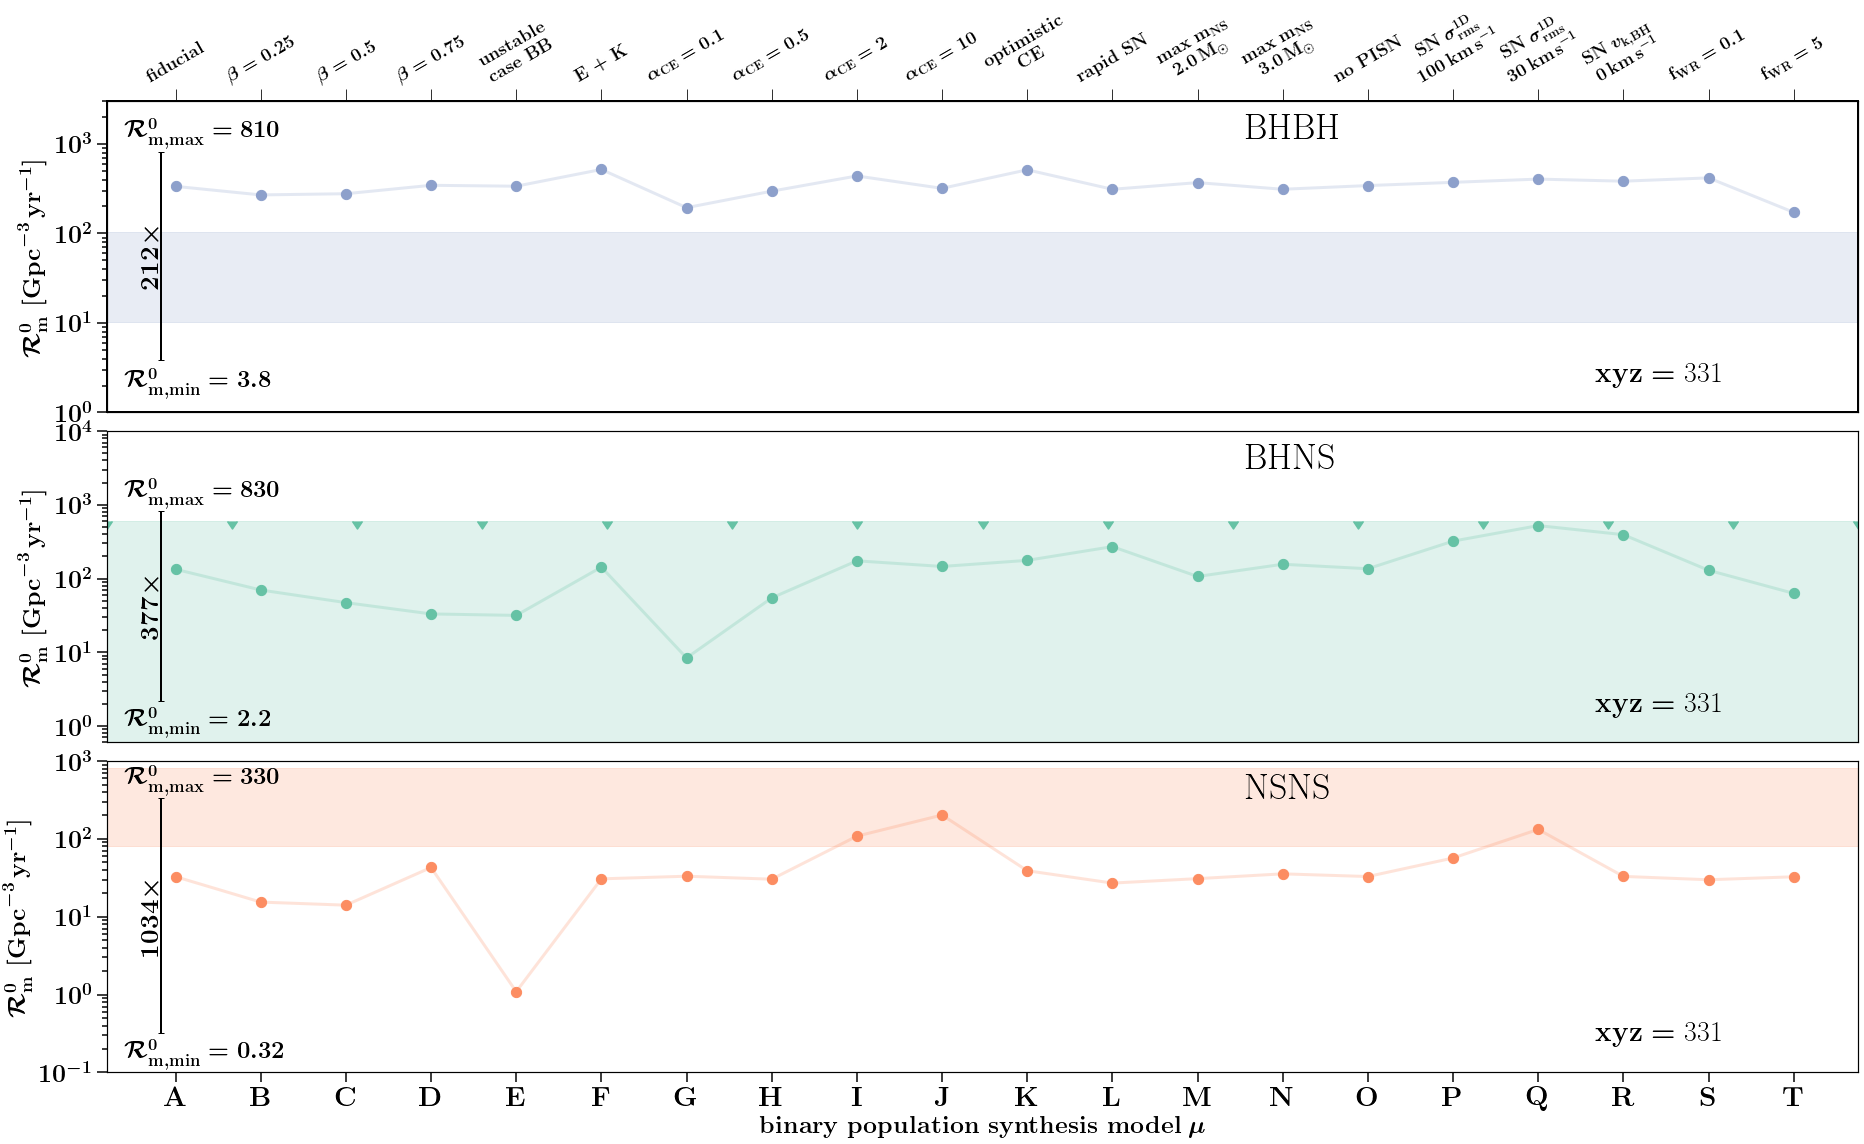

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


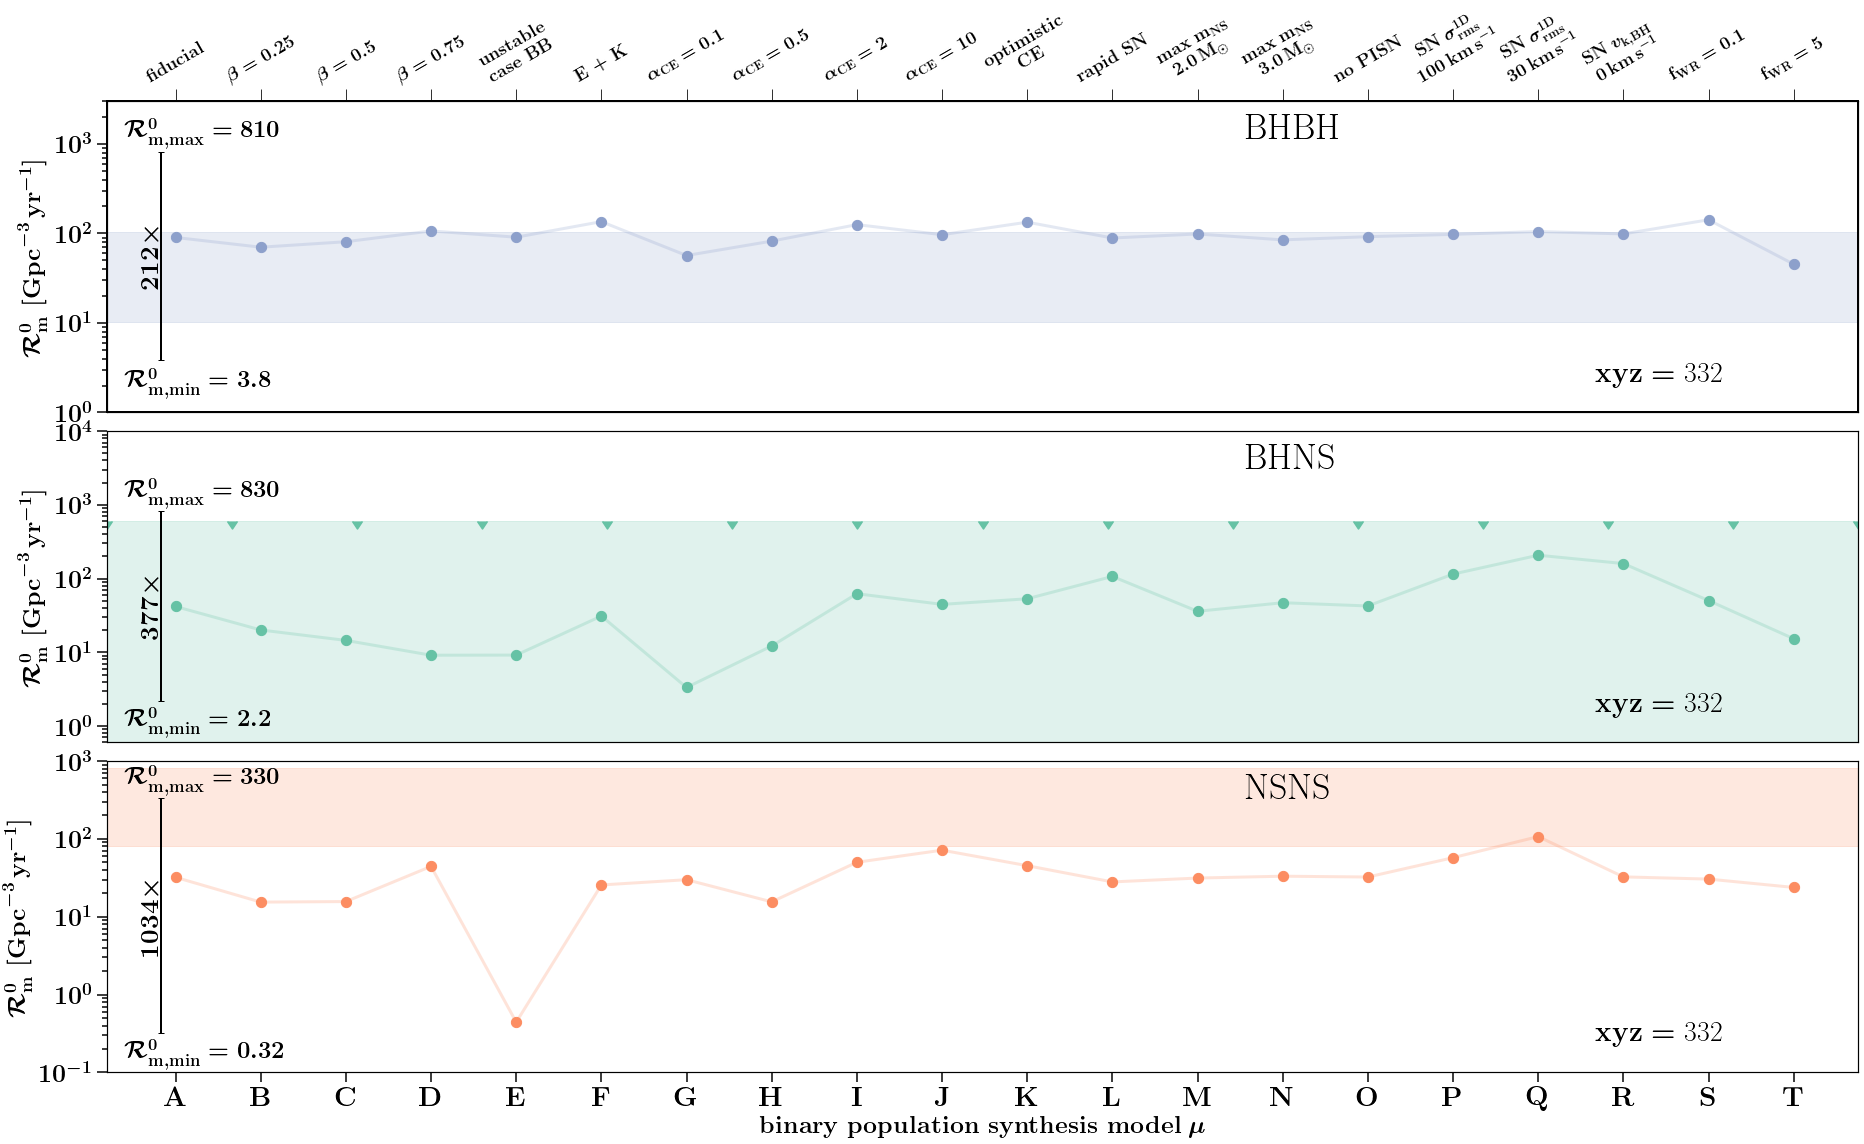

mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
mean scatter per MSSFR:
mean scatter per BPS:
20 nModels


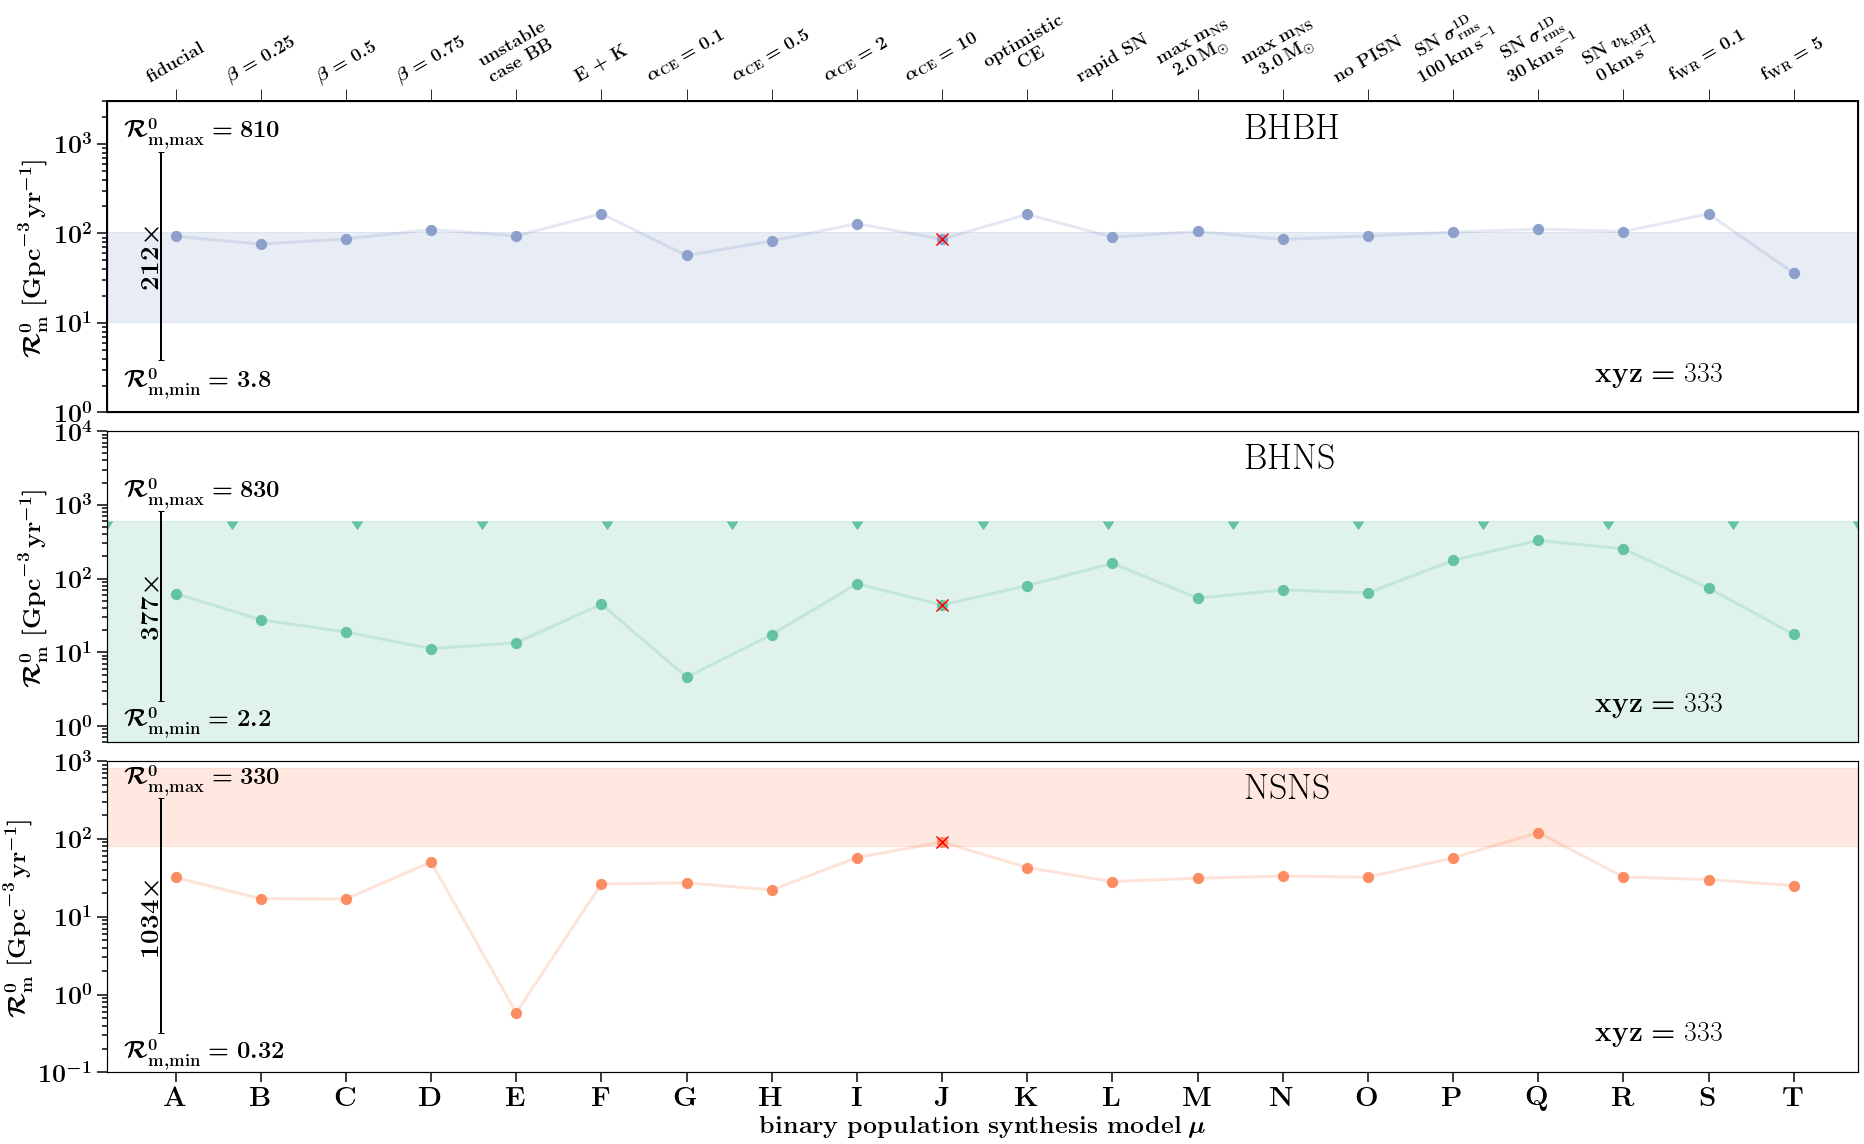

In [19]:
for ind_mssfr in range(28):
    
    ylims =[[1,3000],[0.6,10000],[0.1,1000]]
    plotDCOrates_seperate(whichRate='intrinsic', mssfr_ind=ind_mssfr)

In [ ]:
    
    
    
    
    
    
    
    
    
    
    
#     for ind_t, DCOtype in enumerate(Types):
#         for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#             if ind_L == mssfr_ind:

#                 stringgg = 'AllDCOsimulation'
#                 df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
#                 df = pd.read_csv(df_name, index_col=0).T
#                 rates_L = df[MSSFRnameslistCSV[ind_L]]

#                 if whichRate =='intrinsic':
#                     rates = rates_L[::2][0:nModels]
#                     if MSSFRname=='000':
#                         print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

#                     ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'







#                 elif whichRate=='observed':
#                     rates = rates_L[1::2][0:nModels]
#                     if ind_L==0:
#                         print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                     ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




#                 COLOR=TypeColours[ind_t]#'teal'
#                 zorder=10
#                 label=MSSFRnameslist[ind_L] 
#                 ALPHA=1
#                 lw=5

#                 if MSSFRname=='231': 
#                     ls = MSSFRlinestyles[1]
#                 elif MSSFRname=='312':
#                     ls = MSSFRlinestyles[2]
#                 else:
#                     ls = MSSFRlinestyles[0]


#                 axe[ind_t].plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
#                 axe[ind_t].scatter(range(len(rates)), rates, c=COLOR, s=100, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
#                 # plot fiducial result with a star
#     #             if ind_L==0:
#     #                 axe[ind_t].scatter(range(len(rates))[0], rates[0],\
#     #                                    c=COLOR, s=250, label=label, \
#     #                                    zorder=1000, marker='*', edgecolor='black')




#         ## set some of the axes ranges 
#         xmin = -0.8
#         xmax = nModels -0.5 # change to len(df.T)
# #         xmax_compare = xmax+5


#         # FIX
#         fix=1



#         # calculate statistics: 
#         minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)




# #             print('mean scatter per MSSFR:')
# #         print((minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
# #         print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#         meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

# #             print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
# #         print(minMaxPerBPS[1]/minMaxPerBPS[0])
# #         print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#         meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#         textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#         textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#         minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

#         if whichRate=='intrinsic':
#             textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%roundAndFormat(minn)
#             textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%roundAndFormat(maxx)
#         elif whichRate=='observed':
#             textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
#             textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
#         xloc_text = 0.8502
#         axe[ind_t].text(xloc_text, 0.1, s=r'$\rm{xyz} = $ %s'%MSSFRnameslist[mssfr_ind], rotation = 0, fontsize = fs, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)


#         ## MAKE RANGE ERROR LINE: 
#         resN = 20
#         scatterline_x = -0.25 * np.ones(resN)
#         scatterline_y = np.linspace(minn,maxx, resN)
#         axe[ind_t].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
#         textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
#         yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
#         axe[ind_t].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')


#         axe[ind_t].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t].transAxes)#, weight = 'bold')
#         axe[ind_t].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t].transAxes)#, weight = 'bold')





#         xx = np.linspace(xmin,xmax,15)

#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)


#             if ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=0)
#                 axe[ind_t].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=0)
#                 axe[ind_t].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)
#                 axe[ind_t].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)


#             # for BHNS plot that its a upper limit
#             elif ind_t==1:
#                 axe[ind_t].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=30)

#         else:
#             for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
#                 axe[ind_t].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
#             axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


# #         # make up axes
#         if ind_t ==2:
#             xlabel = r'\textbf{binary population synthesis model} $\mu$'
#         else:
#             xlabel=r'  $\_$ '

#         axe[ind_t].set_xlim(xmin, xmax)
#         axe[ind_t] == layoutAxes(axe[ind_t], nameX=xlabel, nameY=ylabel, setMinor=False)
#         axe[ind_t].set_yscale('log')

#          # Set the tick labels
# #         if ind_t==2:
#         axe[ind_t].set_xticks(range(nModels))




#         #############################


#         axe[ind_t].set_xticklabels(BPSnameslist)

#         axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

#         axe[ind_t].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')



#         ##### SECOND AXIS ######
#         # add physical name labels on top
#         if ind_t==0:
#             physicalnames=[]
#             for ind_m, bps_model in enumerate(BPSnameslist):
#                 physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
#             ax2y = axe[ind_t].twiny()
#             ax2y.set_xlim(xmin, xmax)

#             ax2y.set_xticks(range(nModels))
#             ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)      


#         if ind_t==2:
#             physicalnames = []
#             for ind_m, bps_model in enumerate(BPSnameslist):
#                 physicalnames.append(r'\textbf{%s}'%(bps_model) )
#             axe[ind_t].set_xticks(range(nModels))
#             axe[ind_t].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

#             axe[ind_t].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
#         else:
#             axe[ind_t].set_xticks([])
#             axe[ind_t].set_xticklabels( () )

#     # mark the simulations where all 3 DCO flavors are consistent with 90% confidence interval red.      
#     for ind_L, MSSFRname in enumerate(MSSFRnameslist):
#         if ind_L==mssfr_ind:
#             for ind_t, DCOtype in enumerate(Types):
            
#                 stringgg = 'AllDCOsimulation'
#                 df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
#                 df = pd.read_csv(df_name, index_col=0).T
#                 rates_L = df[MSSFRnameslistCSV[ind_L]]

#                 if whichRate =='intrinsic':
#                     rates = rates_L[::2][0:nModels]
#                     if ind_L==0:
#                         print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

#                     ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


#                 elif whichRate=='observed':
#                     rates = rates_L[1::2][0:nModels]
#                     if ind_L==0:
#                         print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                     ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $' 



#                 if ind_t==0:
#                     rate_BHBH = rates
#                 elif ind_t==1:
#                     rate_BHNS = rates
#                 elif ind_t==2:
#                     rate_NSNS = rates 

#             maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
#             maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
#             maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

#             maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 


#             axe[0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHBH[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)
#             axe[1].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHNS[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)
#             axe[2].scatter((np.array(range(len(rates))))[maskGWTC2], rate_NSNS[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)

